# Predicting the success of a song

In our Big Data/Data Mining Project we are building a model that lets you predict the success of a song.
For that we train a model on a merged dataframe from two datafiles.

### First data file: artists.csv
From this file we take information about the artists. We extract information about the artists, their gender, their age and if they are a group or an individual singer and country.

Link to the datafile: https://www.kaggle.com/datasets/jackharding/spotify-artist-metadata-top-10k

### Second data file: songs.csv
From this file we take information about the songs. We extract information about the song name, the song album name, the playlist name, the lyrics, the track popularity, tempo, loudness, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration  and language.

Link to the datafile: https://www.kaggle.com/datasets/imuhammad/audio-features-and-lyrics-of-spotify-songs

## Preparing Data phase
For the training process we will use the information from the datafiles above and store them in a single dataframe. To construct that single dataframe, we are merging based on the column 'track_artist'. After merging our chosen datasets we got the  a dataframe with the following values:
- track artist
- gender of the artist
- age of the artist
- type of artist
- country
- track name
- track album name
- playlist name
- loudness
- speechiness of the song
- acousticness  of the song
- instrumentalness
- liveness
- valence
- tempo of the song
- duration of the song
- language
- lyrics of the song

On this dataset we will do a feature extraction and after we will train a model using the selected features.

---

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls /content/gdrive/MyDrive/'Colab Notebooks'/'BigData project'/datasets/*.csv
!pwd

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
'/content/gdrive/MyDrive/Colab Notebooks/BigData project/datasets/artists_clean.csv'
'/content/gdrive/MyDrive/Colab Notebooks/BigData project/datasets/artists.csv'
'/content/gdrive/MyDrive/Colab Notebooks/BigData project/datasets/cleaned_dataframe_age.csv'
'/content/gdrive/MyDrive/Colab Notebooks/BigData project/datasets/cleaned_dataframe.csv'
'/content/gdrive/MyDrive/Colab Notebooks/BigData project/datasets/cleaned_dataframe.csv.csv'
'/content/gdrive/MyDrive/Colab Notebooks/BigData project/datasets/cleaned_dataframe_Ly.csv'
'/content/gdrive/MyDrive/Colab Notebooks/BigData project/datasets/cleaned_dataframe_noLy.csv'
'/content/gdrive/MyDrive/Colab Notebooks/BigData project/datasets/cleaned_dataframe_with_Dup.csv'
'/content/gdrive/MyDrive/Colab Notebooks/BigData project/datasets/comx.csv'
'/content/gdrive/MyDrive/Colab Notebooks/BigData project/datasets/fina

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Read in the data from the csv file

In [8]:
SONGS = '/content/gdrive/MyDrive/Colab Notebooks/BigData project/datasets/songs.csv'
ARTISTS = '/content/gdrive/MyDrive/Colab Notebooks/BigData project/datasets/artists.csv'

In [9]:
SONGSCLEAN = '/content/gdrive/MyDrive/Colab Notebooks/BigData project/datasets/songs_clean.csv'
ARTISTSCLEAN = '/content/gdrive/MyDrive/Colab Notebooks/BigData project/datasets/artists_clean.csv'
DUP ='/content/gdrive/MyDrive/Colab Notebooks/BigData project/datasets/cleaned_dataframe_with_Dup.csv'
CLEANED ='/content/gdrive/MyDrive/Colab Notebooks/BigData project/datasets/cleaned_dataframe.csv'
NOLYRICS ='/content/gdrive/MyDrive/Colab Notebooks/BigData project/datasets/cleaned_dataframe_noLy.csv'
LYRICS ='/content/gdrive/MyDrive/Colab Notebooks/BigData project/datasets/cleaned_dataframe_Ly.csv'
FINALDF ='/content/gdrive/MyDrive/Colab Notebooks/BigData project/datasets/final_dataframe.csv'
NOAGE = '/content/gdrive/MyDrive/Colab Notebooks/BigData project/datasets/cleaned_dataframe_age.csv'
SENTIMENTANALYSIS =  '/content/gdrive/MyDrive/Colab Notebooks/BigData project/datasets/sentiment_cleaned.csv'

In [10]:
# read data from csv file
df1 = pd.read_csv(ARTISTS)
df2 = pd.read_csv(SONGS)

In [11]:
# cut away the useless columns from df1: 0, index, country, city_1, district_1, city_2, district_2, city_3, district_3

df1 = df1.drop(['Unnamed: 0', 'index', 'city_1', 'district_1', 'city_2', 'district_2', 'city_3', 'district_3'], axis=1)
# print(df1.head())

In [12]:
# change the name of the column artist to artist_id in df1
df1.rename(columns={'artist':'track_artist'}, inplace=True)
# print(df1.head())

In [13]:
# cut away the useless columns from df2: track_id, track_album_id, track_album_name, track_album_release_date, playlist_name, playlist_genre, playlist_subgenrek, playlist_subgenre, playlist_id, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, language

df2 = df2.drop(['track_id', 'track_album_id', 'track_album_release_date', 'playlist_id'], axis=1)

# print(df2.head())

In [14]:
# save the 2 dataframes to csv files
df1.to_csv(ARTISTSCLEAN)
df2.to_csv(SONGSCLEAN)

In [15]:
# left_outer_join the 2 dataframes on the column track_artist
df = pd.merge(df1, df2, on='track_artist', how='left')
# save the joined dataframe to csv file
df.to_csv(DUP)

In [16]:
# checking if songnames are unique
print(df['track_name'].is_unique)
# finding the duplicates
print(df[df.duplicated(['track_name'])])

False
             track_artist  gender  age    type country     track_name  \
9                   Drake    male   33  person      CA      Crew Love   
15                  Drake    male   33  person      CA      One Dance   
19                  Drake    male   33  person      CA  Hotline Bling   
21                  Drake    male   33  person      CA      One Dance   
22                  Drake    male   33  person      CA      One Dance   
...                   ...     ...  ...     ...     ...            ...   
18240          si_el_bien     NaN    0     NaN     NaN            NaN   
18241  Antonello Venditti    male   71  person      IT            NaN   
18242         Lea Salonga  female   49  person      PH            NaN   
18243    Vertical Horizon   mixed   29   group     NaN            NaN   
18244               Lakko    male    0  person      ES            NaN   

                                                  lyrics  track_popularity  \
9      Take your nose off my keyboard W

In [17]:
# for better overview change the order of the columns
# putting the track_popularity column at the front of the dataframe
cols = list(df.columns)
cols.insert(0, cols.pop(cols.index('track_popularity')))
df = df[cols]

# putting the track_name column at the third column of the dataframe
cols = list(df.columns)
cols.insert(2, cols.pop(cols.index('track_name')))
df = df[cols]

# putting lyrics column at the end of the dataframe
cols = list(df.columns)
cols.insert(23, cols.pop(cols.index('lyrics')))
df = df[cols]

print(df.head())


   track_popularity track_artist                 track_name gender  age  \
0              74.0        Drake               Marvins Room   male   33   
1              18.0        Drake             In My Feelings   male   33   
2               2.0        Drake                    Forever   male   33   
3               1.0        Drake  Hold On, We're Going Home   male   33   
4              12.0        Drake                  One Dance   male   33   

     type country           track_album_name          playlist_name  \
0  person      CA         Take Care (Deluxe)  PROJECT: Contemporary   
1  person      CA                   Scorpion                Hip pop   
2  person      CA                    Forever         Hip-Hop 'n RnB   
3  person      CA  Hold On, We're Going Home         Hip-Hop 'n RnB   
4  person      CA                  One Dance             ELECTROPOP   

  playlist_genre  ... mode  speechiness  acousticness  instrumentalness  \
0            r&b  ...  0.0       0.0921       0

In [18]:
# delete the duplicates
df = df.drop_duplicates(subset=['track_name'], keep='first')
print(df)
# save the dataframe to csv file
df.to_csv(CLEANED)


       track_popularity  track_artist                 track_name  gender  age  \
0                  74.0         Drake               Marvins Room    male   33   
1                  18.0         Drake             In My Feelings    male   33   
2                   2.0         Drake                    Forever    male   33   
3                   1.0         Drake  Hold On, We're Going Home    male   33   
4                  12.0         Drake                  One Dance    male   33   
...                 ...           ...                        ...     ...  ...   
18208              54.0  Gloria Trevi           Vas A Recordarme  female   52   
18209              47.0  Gloria Trevi             Yo Soy Su Vida  female   52   
18210              50.0  Gloria Trevi          Diosa De La Noche  female   52   
18211               0.0  Gloria Trevi             Todos Me Miran  female   52   
18231              31.0        Panama                     Always   mixed   10   

         type country      

In [19]:
# for better overview of the data delete the column lyrics
df_nolyrics = df.drop(['lyrics'], axis=1)
print(df.head())
# save the dataframe to csv file
df_nolyrics.to_csv(NOLYRICS)

   track_popularity track_artist                 track_name gender  age  \
0              74.0        Drake               Marvins Room   male   33   
1              18.0        Drake             In My Feelings   male   33   
2               2.0        Drake                    Forever   male   33   
3               1.0        Drake  Hold On, We're Going Home   male   33   
4              12.0        Drake                  One Dance   male   33   

     type country           track_album_name          playlist_name  \
0  person      CA         Take Care (Deluxe)  PROJECT: Contemporary   
1  person      CA                   Scorpion                Hip pop   
2  person      CA                    Forever         Hip-Hop 'n RnB   
3  person      CA  Hold On, We're Going Home         Hip-Hop 'n RnB   
4  person      CA                  One Dance             ELECTROPOP   

  playlist_genre  ... mode  speechiness  acousticness  instrumentalness  \
0            r&b  ...  0.0       0.0921       0

#Sentiment Analysis of the song text

From the Sentiment Analysis we got 2 different values, one of them is the subjectivity of the lyrics and the other one is the polarity of the lyrics.
- subjectivity: a value between 0 and 1, 0 means the most objective and 1 means the most subjective lyrics possible
- polarity: a value is on the scale between -1 and 1, -1 is the most negative and 1 is the most happy sentiment possible.

For the analysis we are using the TextBlob Libray for processing textual data.

---

In [20]:
from textblob import TextBlob

def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
   return TextBlob(text).sentiment.polarity

clean_lyrics = df.lyrics.tolist()

def split_array(arr, num_pieces):
    piece_length = len(arr) // num_pieces
    split_pieces = np.array_split(arr, num_pieces)
    return split_pieces

clean_lyrics = split_array(clean_lyrics, 2000)
df['sentiment'] = np.nan
sentiment = []
subjectivity = []

for lyrics_array in clean_lyrics:
  for lyrics in lyrics_array:
    sentiment.append(str(round(getPolarity(lyrics),3)))
    subjectivity.append(getSubjectivity(lyrics))

df['sentiment'] = df.index % len(sentiment)
df['subjectivity'] = df.index % len(subjectivity)
df['sentiment'] = df['sentiment'].apply(lambda x: sentiment[x])
df['subjectivity'] = df['subjectivity'].apply(lambda x: subjectivity[x])

print(df)

       track_popularity  track_artist                 track_name  gender  age  \
0                  74.0         Drake               Marvins Room    male   33   
1                  18.0         Drake             In My Feelings    male   33   
2                   2.0         Drake                    Forever    male   33   
3                   1.0         Drake  Hold On, We're Going Home    male   33   
4                  12.0         Drake                  One Dance    male   33   
...                 ...           ...                        ...     ...  ...   
18208              54.0  Gloria Trevi           Vas A Recordarme  female   52   
18209              47.0  Gloria Trevi             Yo Soy Su Vida  female   52   
18210              50.0  Gloria Trevi          Diosa De La Noche  female   52   
18211               0.0  Gloria Trevi             Todos Me Miran  female   52   
18231              31.0        Panama                     Always   mixed   10   

         type country      

In [21]:
# remove lyrics column because from the lyrics we have the sentiment and objectivity/subjectivity
df = df.drop(['lyrics'], axis=1)
print(df.head())
# save the dataframe to csv file
df.to_csv(SENTIMENTANALYSIS)

   track_popularity track_artist                 track_name gender  age  \
0              74.0        Drake               Marvins Room   male   33   
1              18.0        Drake             In My Feelings   male   33   
2               2.0        Drake                    Forever   male   33   
3               1.0        Drake  Hold On, We're Going Home   male   33   
4              12.0        Drake                  One Dance   male   33   

     type country           track_album_name          playlist_name  \
0  person      CA         Take Care (Deluxe)  PROJECT: Contemporary   
1  person      CA                   Scorpion                Hip pop   
2  person      CA                    Forever         Hip-Hop 'n RnB   
3  person      CA  Hold On, We're Going Home         Hip-Hop 'n RnB   
4  person      CA                  One Dance             ELECTROPOP   

  playlist_genre  ... speechiness  acousticness  instrumentalness  liveness  \
0            r&b  ...      0.0921       0.6

# Statistical Information about the data

Generated with Matplotlib and pandas

---

### How many songs per Artists?

In [22]:
# rename all special characters in the column track_artist, because one of the arists has a '$' in the name, which cannot be processed.
df['track_artist'] = df['track_artist'].str.replace('$', 'S')

<ipython-input-22-83fd4d182946>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['track_artist'] = df['track_artist'].str.replace('$', 'S')


Text(0, 0.5, 'Number of Songs')

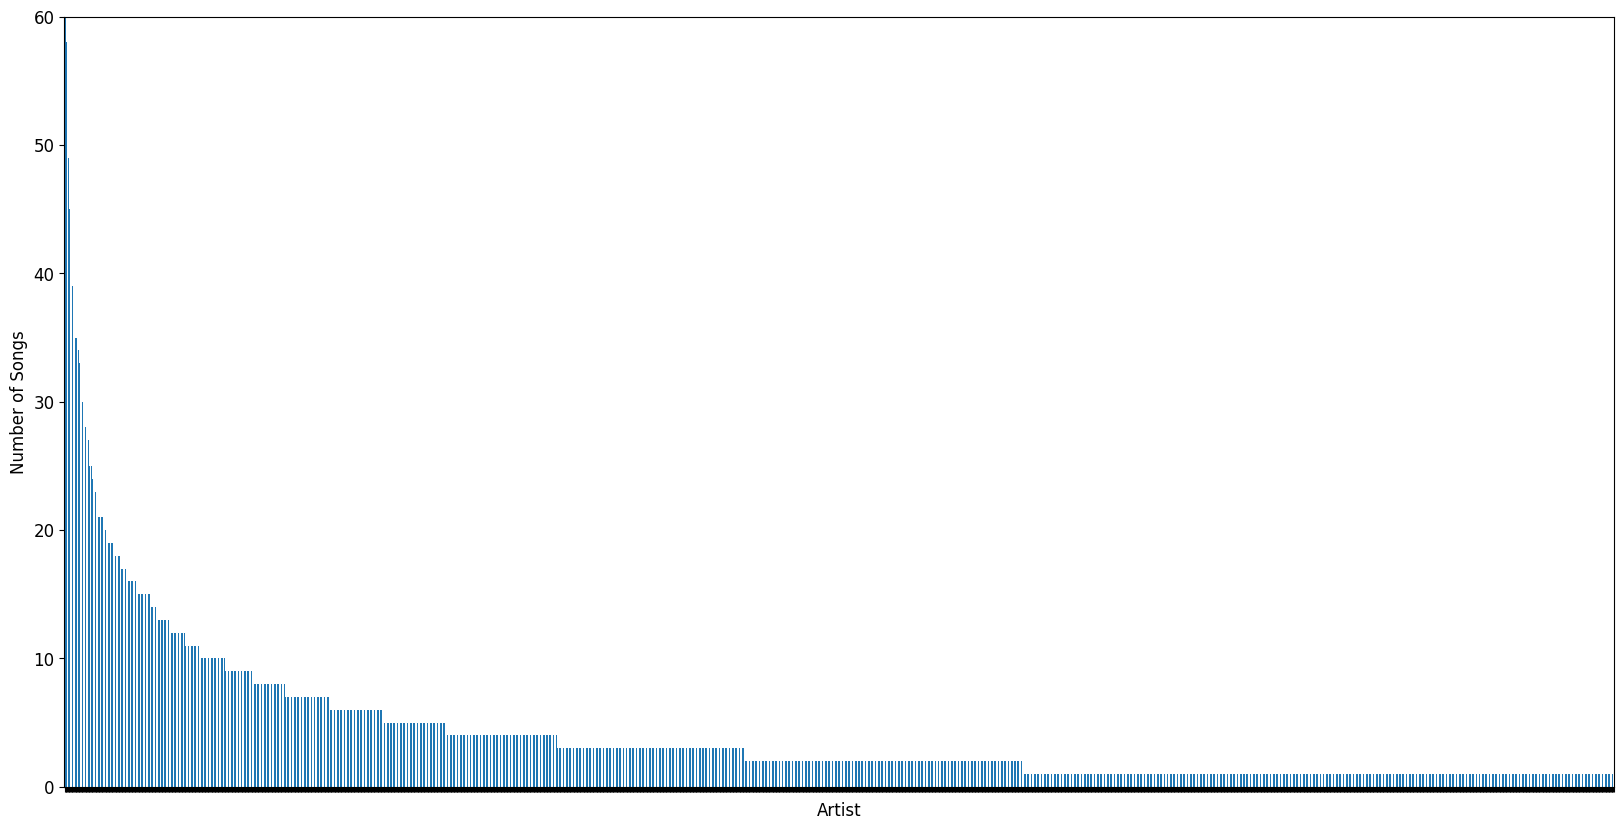

In [23]:
# Diagram of the number of songs per artist, x axis = artist, y axis = number of songs, without displaying the artist names, because there are too many
# The diagram goes till 50 at the y axis


counts = df['track_artist'].value_counts()
ax = counts.plot(kind='bar', figsize=(20,10), fontsize=12)
ax.set_xlabel("Artist", fontsize=12)
ax.set_ylim([0, 60])
ax.set_xticklabels([])
ax.set_ylabel("Number of Songs", fontsize=12)

Text(0, 0.5, 'Number of songs')

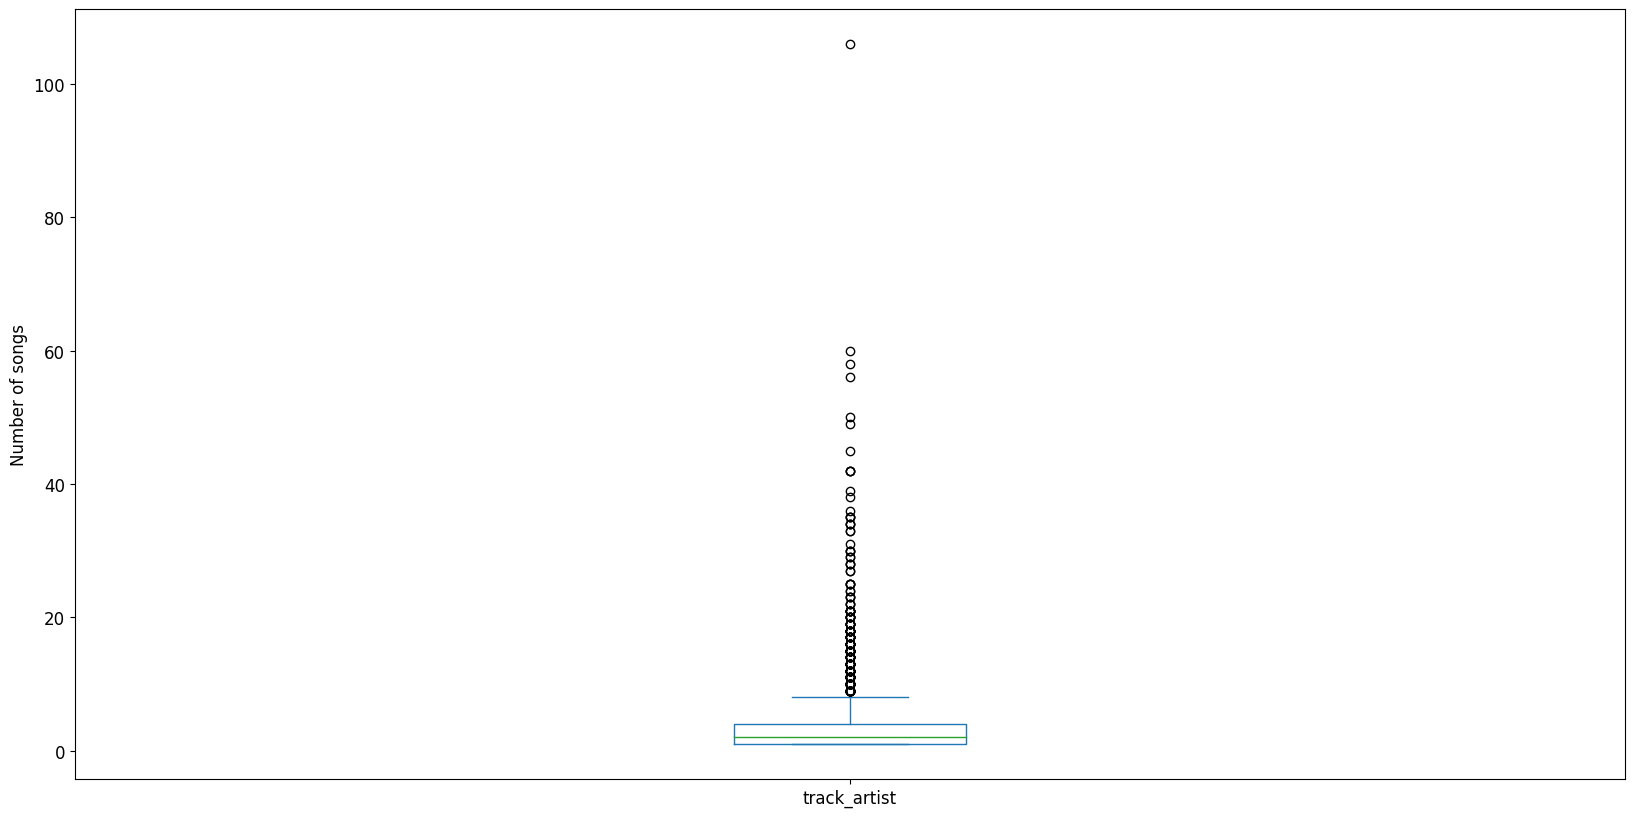

In [24]:
# Boxplot about the number of songs per artist
counts = df['track_artist'].value_counts()
ax = counts.plot(kind='box', figsize=(20,10), fontsize=12)
ax.set_ylabel("Number of songs", fontsize=12)

### How is the gender distributed of the artists?

Text(0, 0.5, 'Number of Songs')

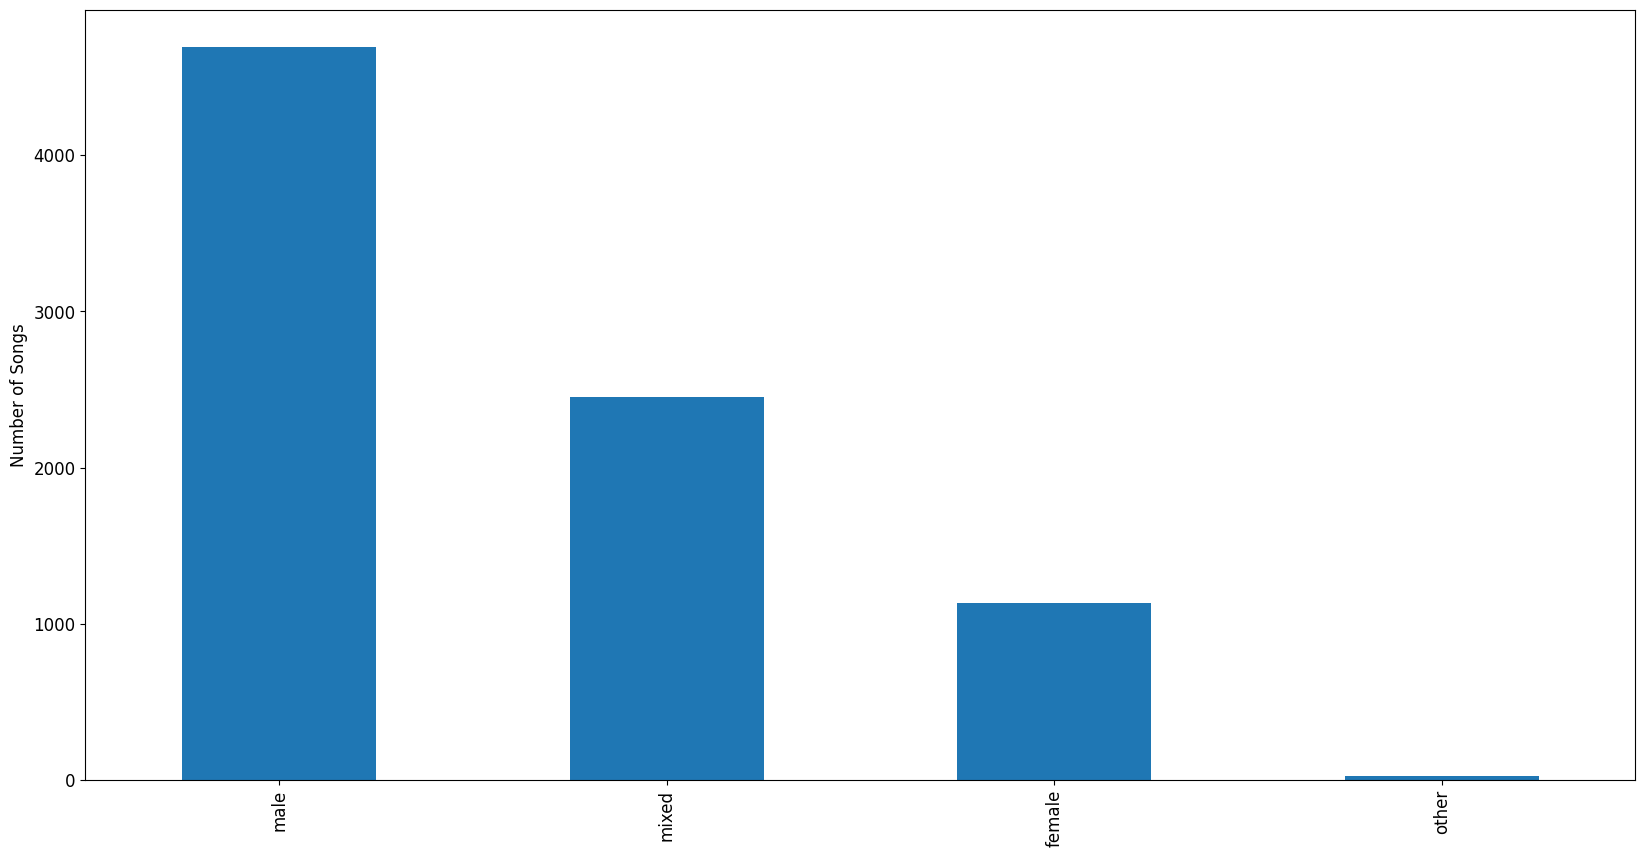

In [25]:
# Diagram of Number of Gender of arists
counts = df['gender'].value_counts()
ax = counts.plot(kind='bar', figsize=(20,10), fontsize=12)
ax.set_ylabel("Number of Songs", fontsize=12)

### How is the age distributed among the artists?

Text(0, 0.5, 'Number of Songs')

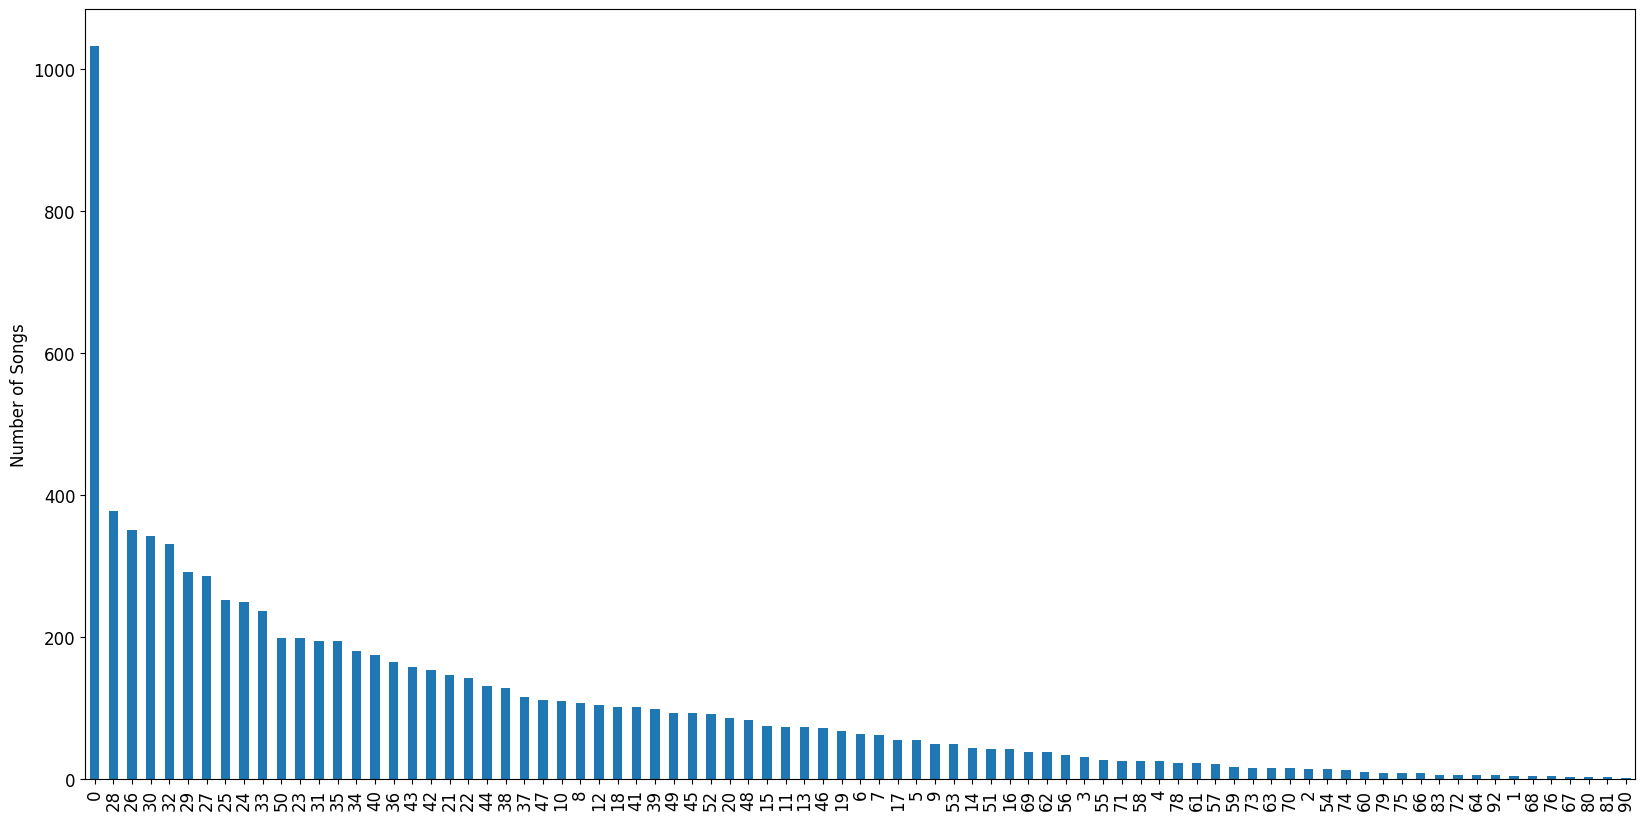

In [26]:
# diagram of the age of the artists
counts = df['age'].value_counts()
ax = counts.plot(kind='bar', figsize=(20,10), fontsize=12)
ax.set_ylabel("Number of Songs", fontsize=12)


**Take out the age, because the data is not valid, not all values allign with the truth**

Further investigation of the age-values:

In [27]:
# get all the ages between 0 and 10 in the artists dataframe
print(df1.loc[(df1['age'] >= 0) & (df1['age'] <= 10)])

          track_artist gender  age    type country
14    The Chainsmokers  mixed    8   group      US
45            Swae Lee   male    0  person      US
54       Manuel Turizo   male    0  person      CO
58          Anne-Marie    NaN    0     NaN     NaN
73              Offset   male    0  person     NaN
...                ...    ...  ...     ...     ...
9985        Bombotunes    NaN    0     NaN     NaN
9986            Panama  mixed   10   group      AU
9987         Pablo Paz   male    0  person     NaN
9995        si_el_bien    NaN    0     NaN     NaN
9999             Lakko   male    0  person      ES

[4818 rows x 5 columns]


### Cut the age out of the DF for training

In [28]:
# cut the age of the artists out of dataframe df and store df
df = df.drop(['age'], axis=1)
print(df.head())
# save the dataframe to csv file
df.to_csv(NOAGE)

   track_popularity track_artist                 track_name gender    type  \
0              74.0        Drake               Marvins Room   male  person   
1              18.0        Drake             In My Feelings   male  person   
2               2.0        Drake                    Forever   male  person   
3               1.0        Drake  Hold On, We're Going Home   male  person   
4              12.0        Drake                  One Dance   male  person   

  country           track_album_name          playlist_name playlist_genre  \
0      CA         Take Care (Deluxe)  PROJECT: Contemporary            r&b   
1      CA                   Scorpion                Hip pop            r&b   
2      CA                    Forever         Hip-Hop 'n RnB            rap   
3      CA  Hold On, We're Going Home         Hip-Hop 'n RnB            rap   
4      CA                  One Dance             ELECTROPOP            pop   

    playlist_subgenre  ...  speechiness  acousticness  instrum

### How are the type of groups distributed?

Text(0, 0.5, 'Number of Songs')

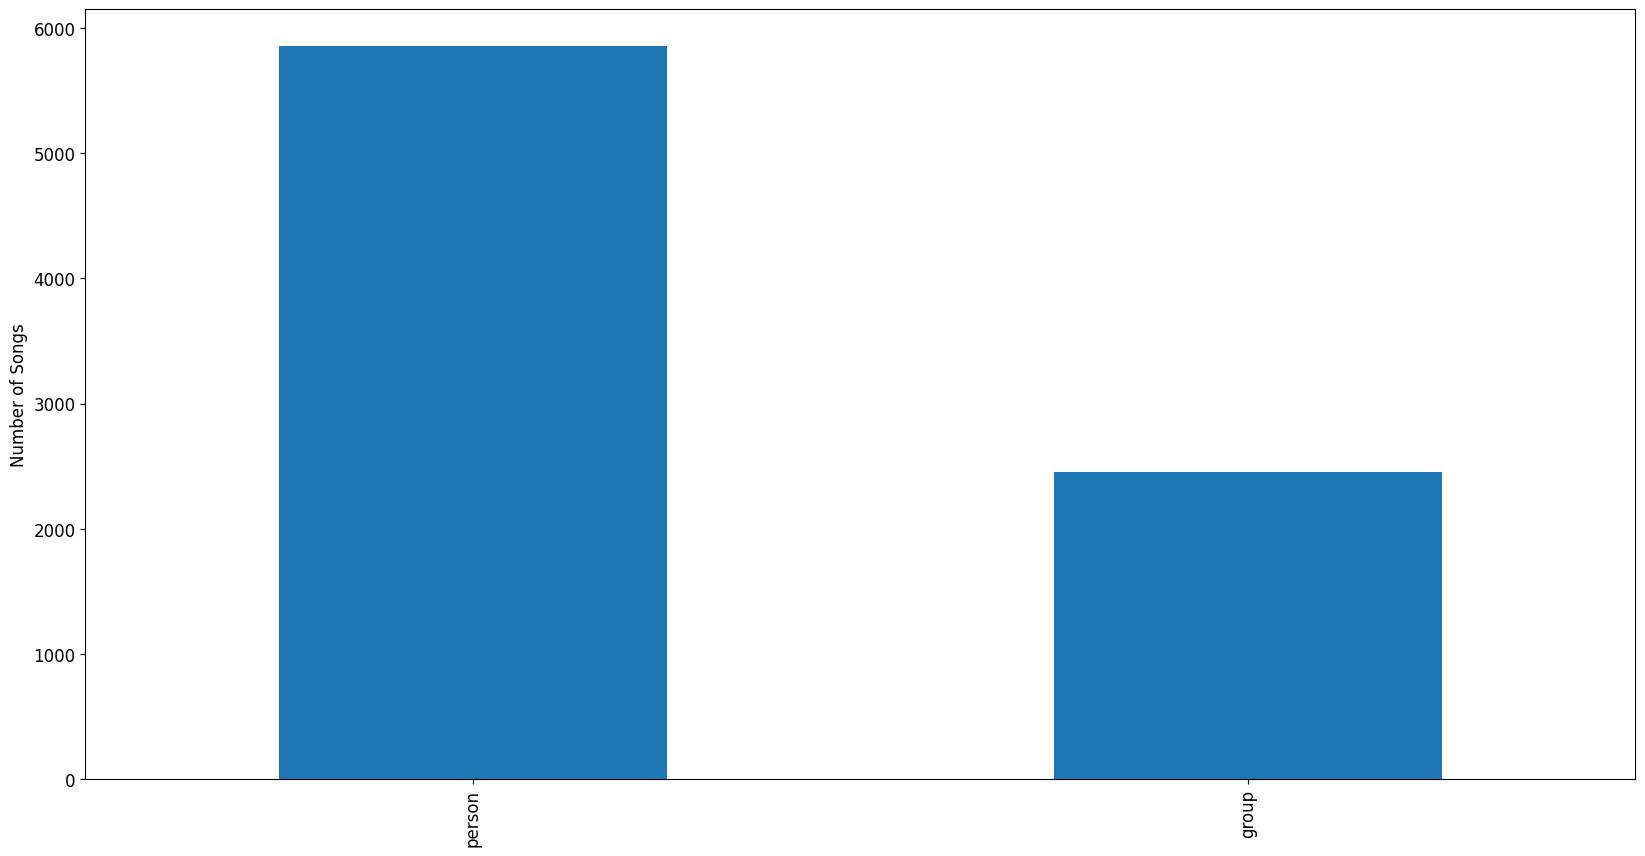

In [29]:
# Diagram about the type (Group or single person) of the artist
counts = df['type'].value_counts()
ax = counts.plot(kind='bar', figsize=(20,10), fontsize=12)
ax.set_ylabel("Number of Songs", fontsize=12)


### How is the duration of the songs distributed?

Text(0, 0.5, 'Duration in ms')

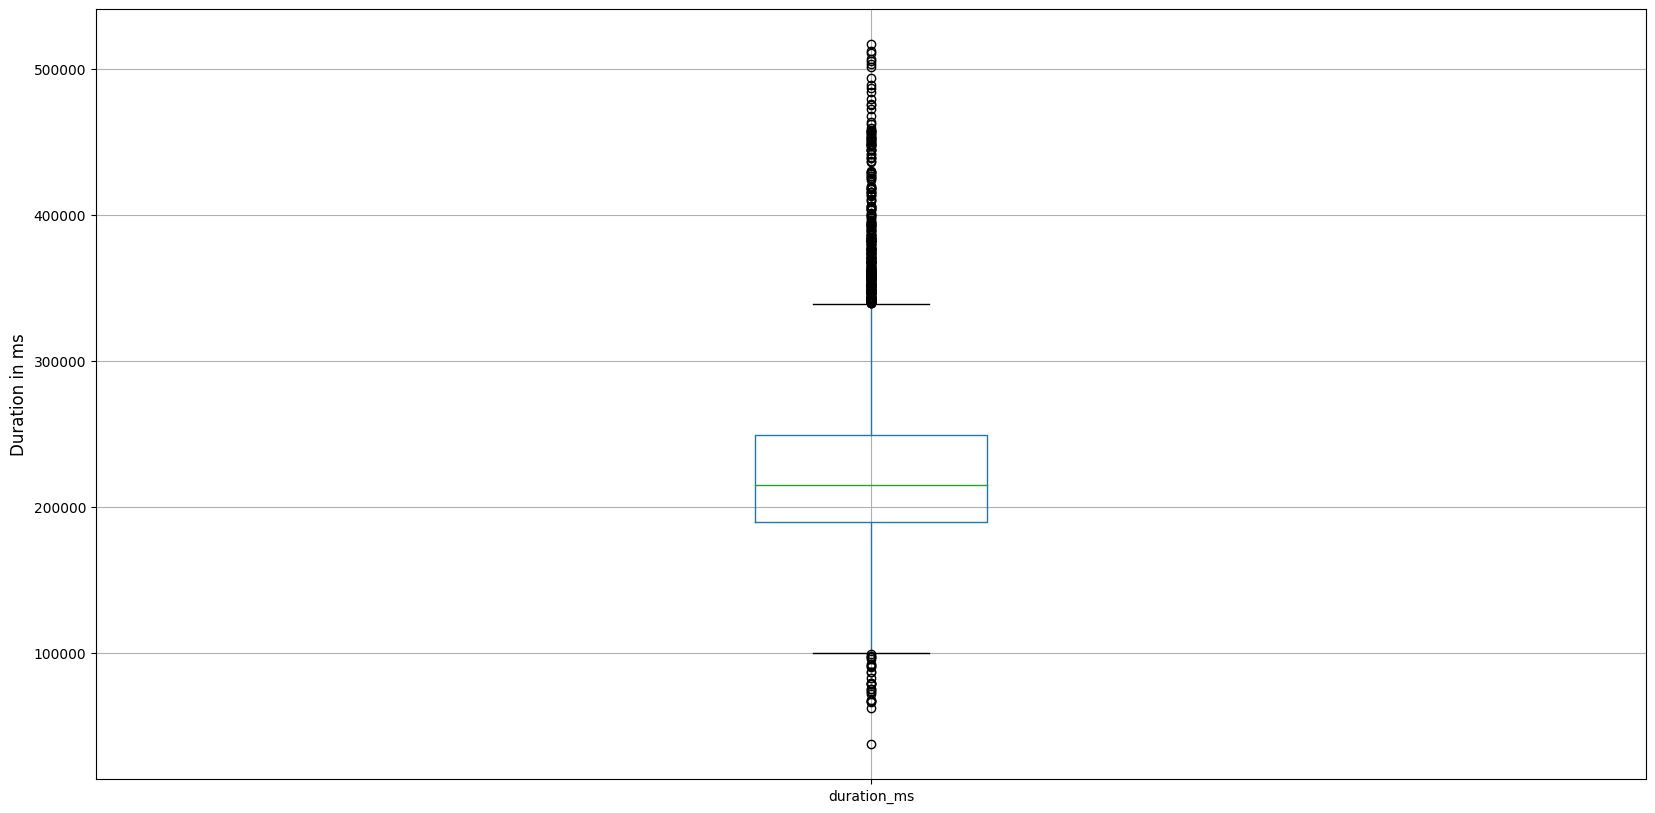

In [30]:
# Boxplot of the duration of the songs
ax = df.boxplot(column=['duration_ms'], figsize=(20,10))
ax.set_ylabel("Duration in ms", fontsize=12)

### How is the tempo of the songs distributed?

Text(0, 0.5, 'Tempo')

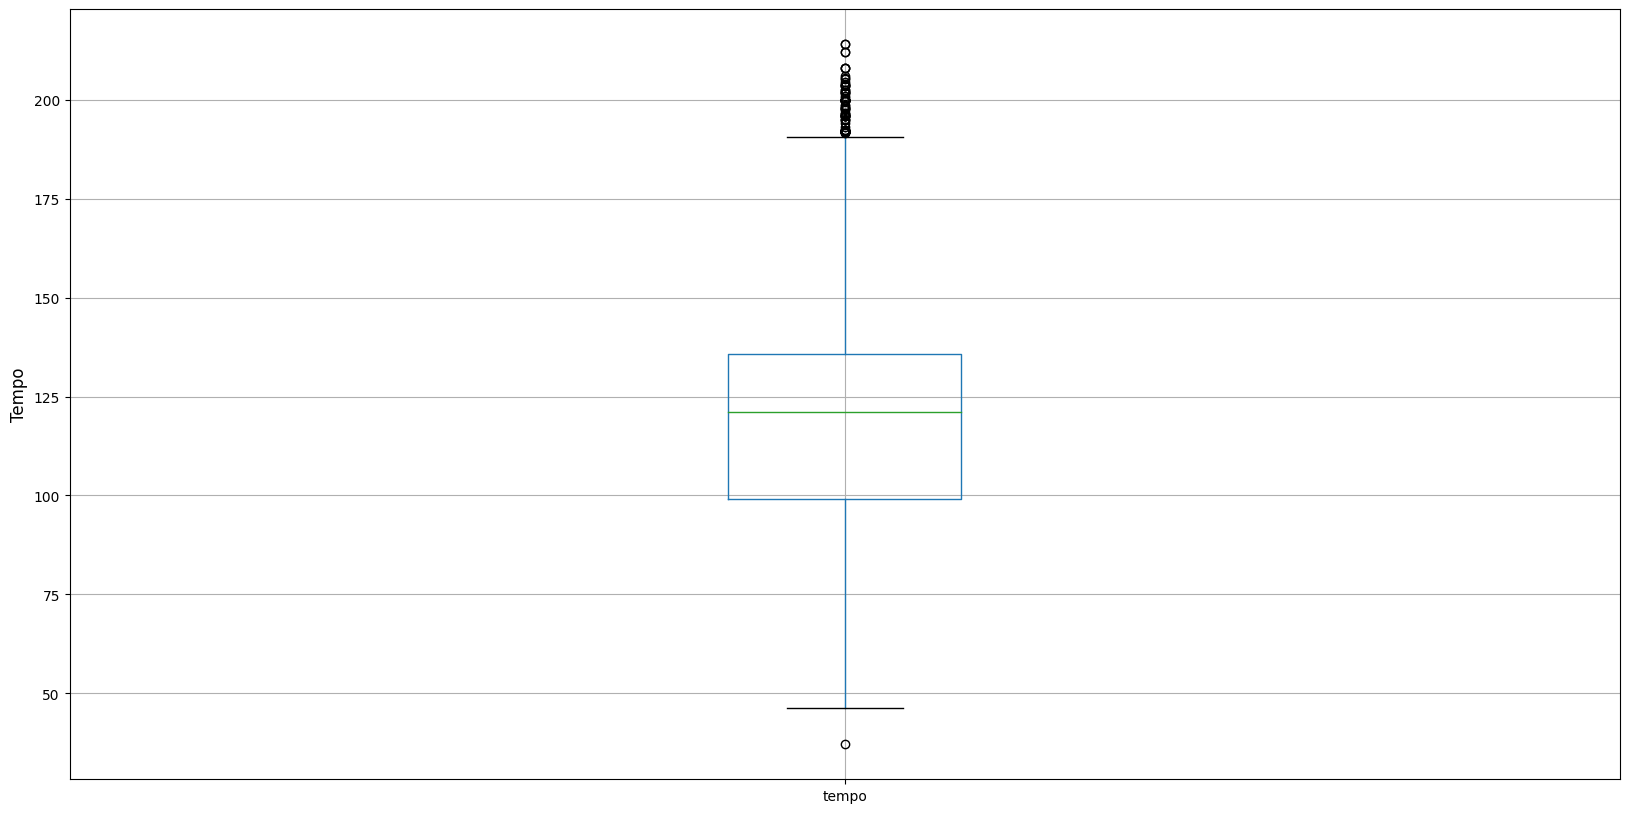

In [31]:
# Boxplot of the tempo of the songs
ax = df.boxplot(column=['tempo'], figsize=(20,10))
ax.set_ylabel("Tempo", fontsize=12)

### How is the popularity of the songs distributed?

For us it is the most important value, because this is the values that we want to predict in the end. It is important that this data is well distributed, so that in the training process we will not introduce a bios, by training on compromised trainings data.

Text(0, 0.5, 'Popularity')

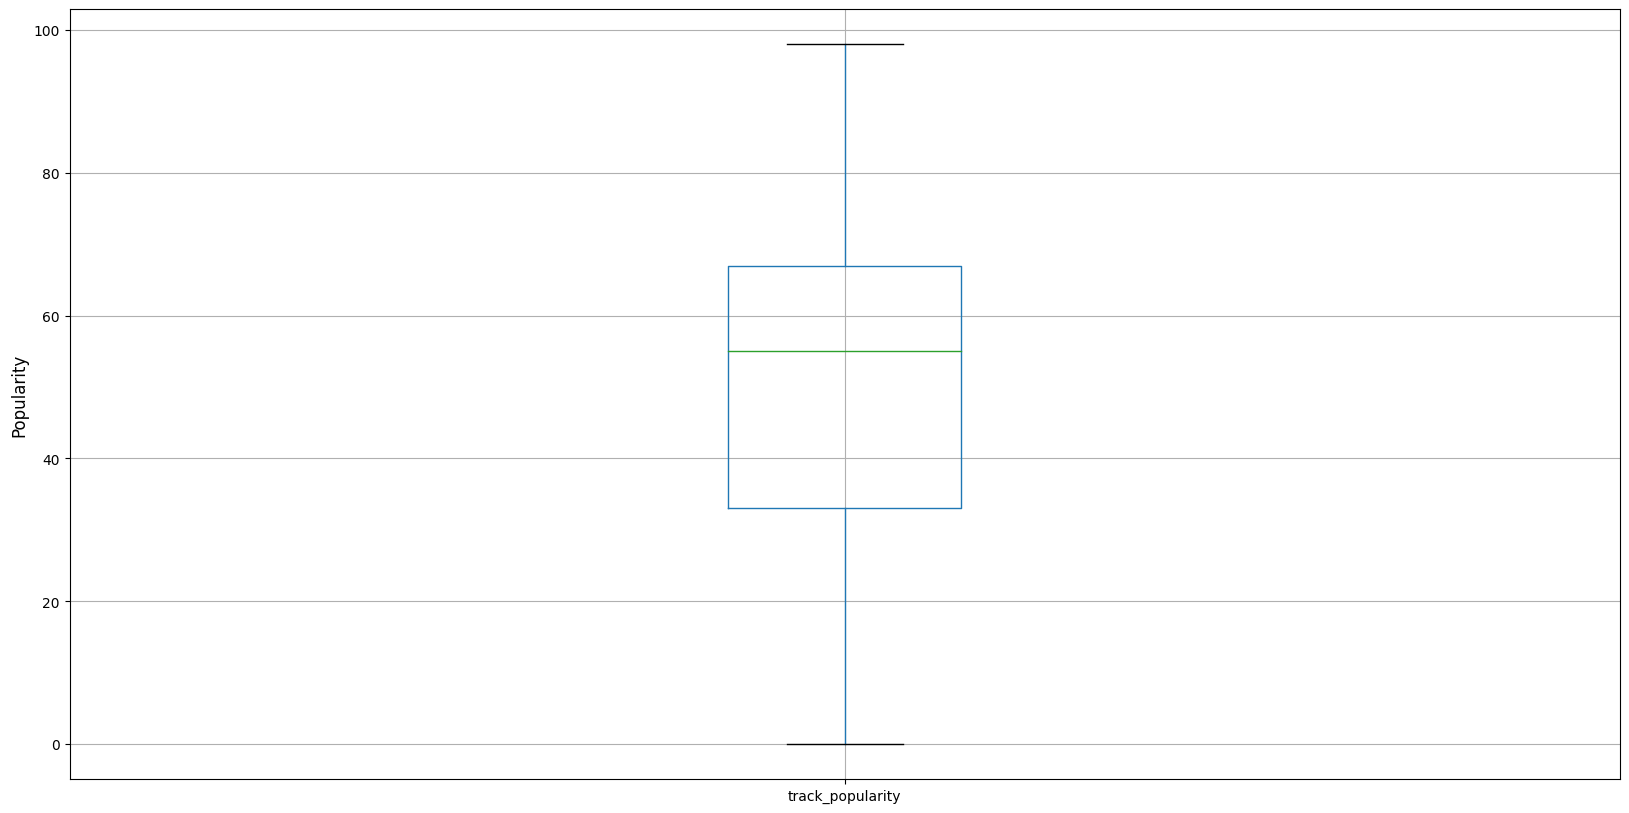

In [32]:
# Boxplot of the popularity of the songs
ax = df.boxplot(column=['track_popularity'], figsize=(20,10))
ax.set_ylabel("Popularity", fontsize=12)

Text(0, 0.5, 'Number of Songs')

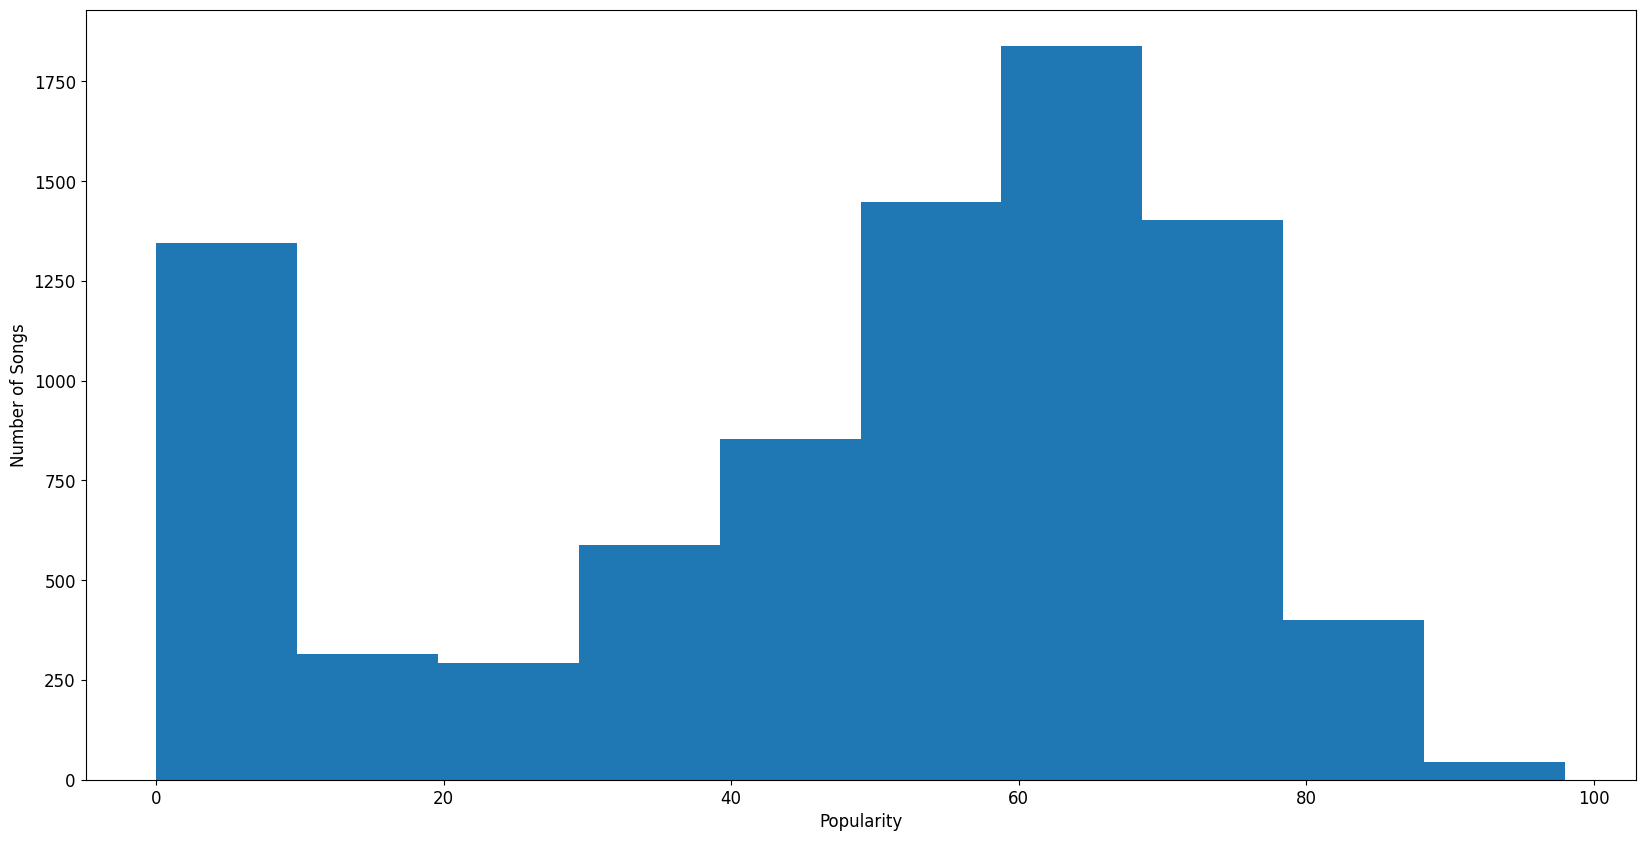

In [33]:
# Continous Diagram that shows the distribution of the popularity of the songs
ax = df['track_popularity'].plot(kind='hist', figsize=(20,10), fontsize=12)
ax.set_xlabel("Popularity", fontsize=12)
ax.set_ylabel("Number of Songs", fontsize=12)

---
---

### How is the sentiment of the lyrics distributed?


   track_popularity track_artist                 track_name gender    type  \
0              74.0        Drake               Marvins Room   male  person   
1              18.0        Drake             In My Feelings   male  person   
2               2.0        Drake                    Forever   male  person   
3               1.0        Drake  Hold On, We're Going Home   male  person   
4              12.0        Drake                  One Dance   male  person   

  country           track_album_name          playlist_name playlist_genre  \
0      CA         Take Care (Deluxe)  PROJECT: Contemporary            r&b   
1      CA                   Scorpion                Hip pop            r&b   
2      CA                    Forever         Hip-Hop 'n RnB            rap   
3      CA  Hold On, We're Going Home         Hip-Hop 'n RnB            rap   
4      CA                  One Dance             ELECTROPOP            pop   

    playlist_subgenre  ...  speechiness  acousticness  instrum

Text(0, 0.5, 'Sentiment')

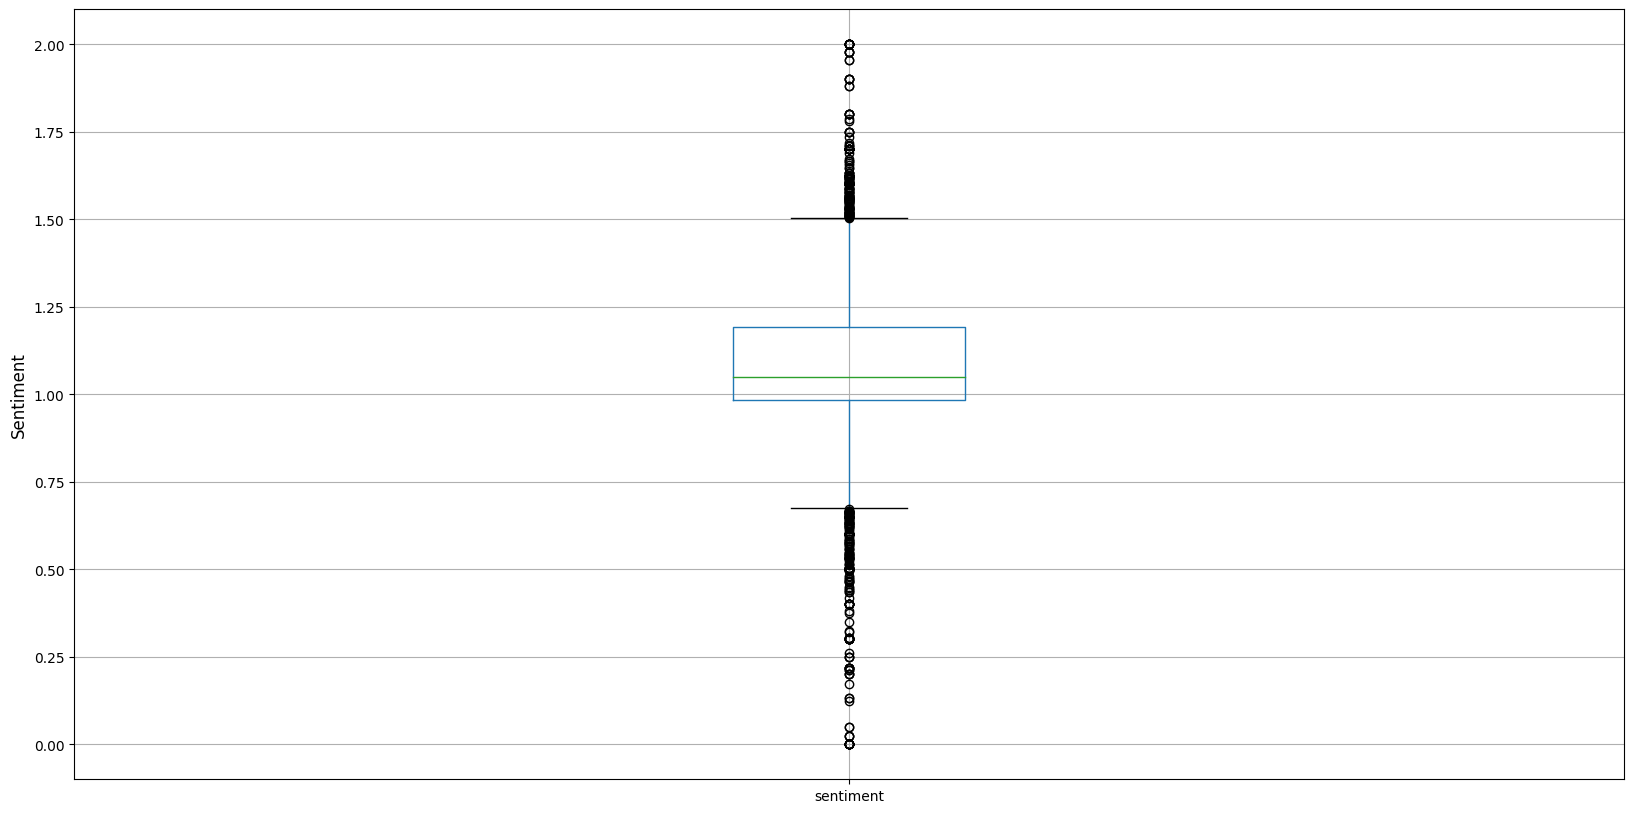

In [34]:
print(df.head())
print("-----")
print(df['sentiment'])

# add 1 to the sentiment column, because the sentiment is between -1 and 1
df['sentiment'] = df['sentiment'].apply(lambda x: float(x) + 1)

# Create a boxplot of the Sentiment of the songs
ax = df.boxplot(column=['sentiment'], figsize=(20,10))
ax.set_ylabel("Sentiment", fontsize=12)

### How is the subjectivity of the lyrics is distributed?

Text(0, 0.5, 'Subjectivity')

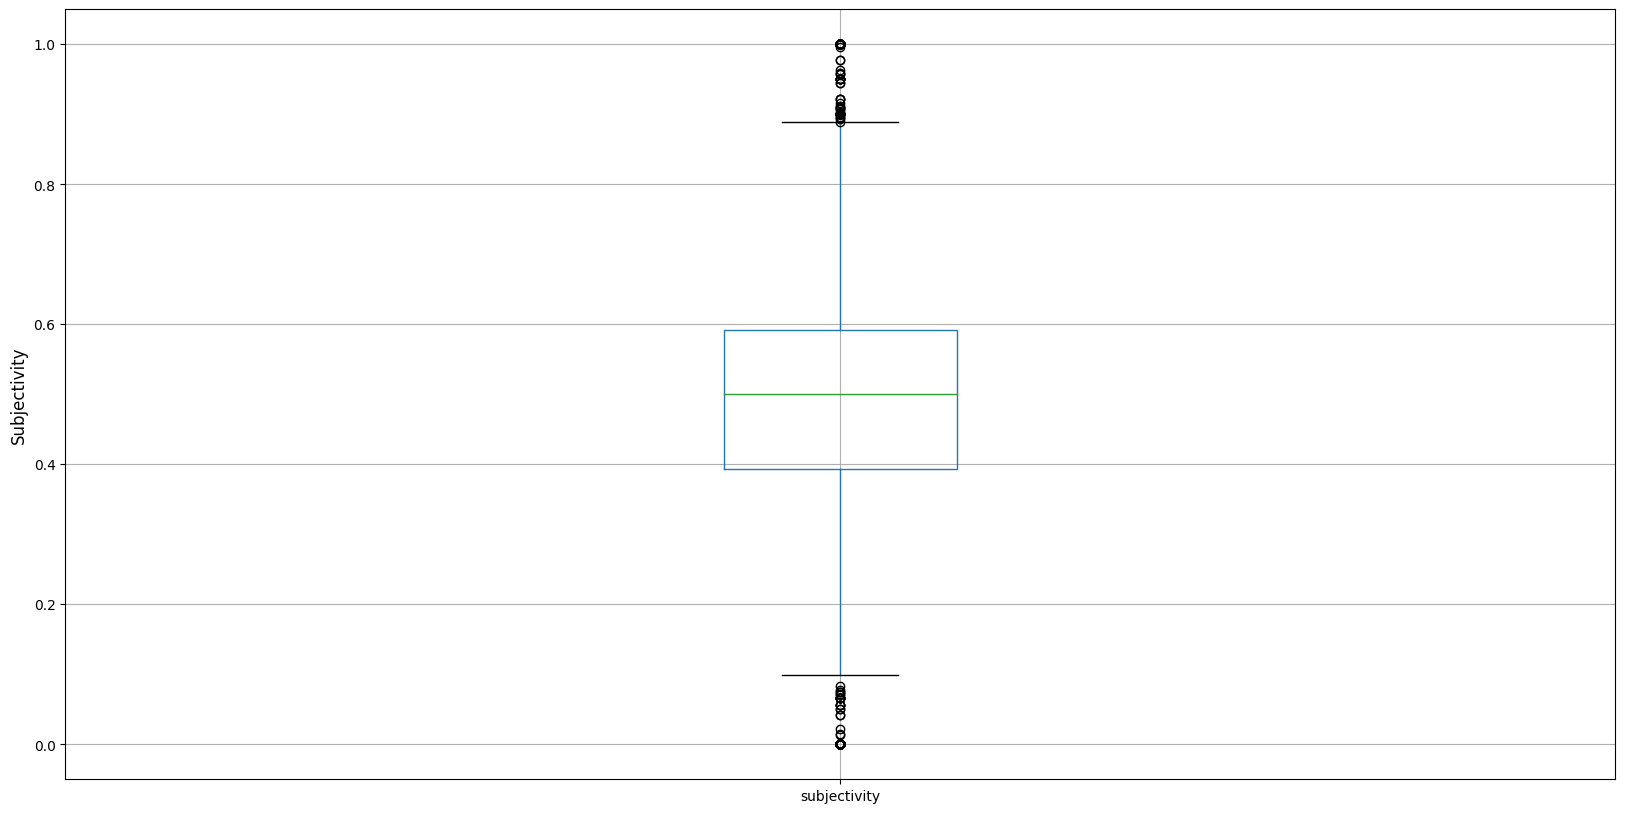

In [35]:
# Create a boxplot for the Subjectivity of the songs
ax = df.boxplot(column=['subjectivity'], figsize=(20,10))
ax.set_ylabel("Subjectivity", fontsize=12)

## Delete the NaNs


In [36]:
# Find all NaN values in the dataframe
print(df.isnull().sum())

# print all the rows with NaN values
print(df[df.isnull().any(axis=1)])

# delete all the rows with NaN values
df = df.dropna()

track_popularity        1
track_artist            0
track_name              1
gender                222
type                  222
country              1330
track_album_name        1
playlist_name           1
playlist_genre          1
playlist_subgenre       1
danceability            1
energy                  1
key                     1
loudness                1
mode                    1
speechiness             1
acousticness            1
instrumentalness        1
liveness                1
valence                 1
tempo                   1
duration_ms             1
language               85
sentiment               0
subjectivity            0
dtype: int64
       track_popularity   track_artist               track_name  gender  \
497                 NaN       Anuel Aa                      NaN    male   
671                71.0    Nicki Minaj               Super Bass  female   
672                46.0    Nicki Minaj                    Miami  female   
673                69.0    Nicki Mina

# Feature extraction

### We decided on multiple methods of feature reduction!

 1. Correlation Matrix

 2. PCA to get an overview of the correlation of the data

 3. Forward Selection and Backward Selection to get the most important data

 4. Algorithm that computes the average placing in the forward and backward selection, as well as an additional ranking taking the correlation matrix into account. The worst ranked values are not under the selected features for the next steps
---


In [37]:
COMX = '/content/gdrive/MyDrive/Colab Notebooks/BigData project/datasets/comx.csv'

In [38]:
# print all column categories
print(df.columns)

# print how many different values are in the column country
print(df['country'].value_counts())
print(df['country'].value_counts().count())

# print how many different vaules are in the columns playlist_genre
print(df['playlist_genre'].value_counts())
print(df['playlist_genre'].value_counts().count())

# print how many different values are in the column playlist_subgenre
print(df['playlist_subgenre'].value_counts())
print(df['playlist_subgenre'].value_counts().count())

# print how many different values are in the column language
print(df['language'].value_counts())
print(df['language'].value_counts().count())

# print how many different values are in the column track_artist
print(df['track_artist'].value_counts())
print(df['track_artist'].value_counts().count())

Index(['track_popularity', 'track_artist', 'track_name', 'gender', 'type',
       'country', 'track_album_name', 'playlist_name', 'playlist_genre',
       'playlist_subgenre', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'language', 'sentiment',
       'subjectivity'],
      dtype='object')
US    3170
GB    1069
PR     443
NL     326
CA     237
DE     197
SE     176
FR     152
CO     148
AU     128
IT     127
MX     114
NO      88
IE      74
AR      71
BR      62
ES      61
BE      56
KR      45
DK      39
PH      31
JM      31
PL      29
VE      24
JP      24
DO      21
AT      21
IS      13
PA      13
NZ      10
SN      10
EE       8
CL       8
CU       7
UY       5
ID       5
IN       5
IL       5
CH       5
TW       4
TR       4
AG       4
FI       4
GT       3
PE       3
SG       3
RO       2
CN       2
TN       2
XK       2
ZA       2
LT       2
PK       1
CZ   

## 1. Correlation Matrix

### Create the Correlation Matrix

For the correlation matrix we need to factorize the columns with strings

In [39]:
# copy the dataframe to a new dataframe to save the factorized dataframe
df_factorized = df.copy()

# changing every value that is a string to a number using factorize
df_factorized['track_artist'] = pd.factorize(df_factorized['track_artist'])[0]
df_factorized['track_name'] = pd.factorize(df_factorized['track_name'])[0]
df_factorized['gender'] = pd.factorize(df_factorized['gender'])[0]
df_factorized['country'] = pd.factorize(df_factorized['country'])[0]
df_factorized['track_album_name'] = pd.factorize(df_factorized['track_album_name'])[0]
df_factorized['playlist_name'] = pd.factorize(df_factorized['playlist_name'])[0]
df_factorized['playlist_genre'] = pd.factorize(df_factorized['playlist_genre'])[0]
df_factorized['playlist_subgenre'] = pd.factorize(df_factorized['playlist_subgenre'])[0]
df_factorized['language'] = pd.factorize(df_factorized['language'])[0]
df_factorized['type'] = pd.factorize(df_factorized['type'])[0]

print(df_factorized.head())

   track_popularity  track_artist  track_name  gender  type  country  \
0              74.0             0           0       0     0        0   
1              18.0             0           1       0     0        0   
2               2.0             0           2       0     0        0   
3               1.0             0           3       0     0        0   
4              12.0             0           4       0     0        0   

   track_album_name  playlist_name  playlist_genre  playlist_subgenre  ...  \
0                 0              0               0                  0  ...   
1                 1              1               0                  1  ...   
2                 2              2               1                  2  ...   
3                 3              2               1                  2  ...   
4                 4              3               2                  3  ...   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.0921      

                   track_popularity  track_artist  track_name    gender  \
track_popularity           1.000000     -0.163418   -0.166834  0.000777   
track_artist              -0.163418      1.000000    0.978740  0.248955   
track_name                -0.166834      0.978740    1.000000  0.248943   
gender                     0.000777      0.248955    0.248943  1.000000   
type                      -0.038358      0.261255    0.265706  0.918280   
country                   -0.003913      0.103725    0.137213  0.027371   
track_album_name          -0.155293      0.959097    0.977915  0.246336   
playlist_name             -0.136520      0.502245    0.523109  0.267378   
playlist_genre            -0.091540      0.114039    0.108864  0.318347   
playlist_subgenre         -0.132230      0.234838    0.236592  0.271224   
danceability               0.085328     -0.125561   -0.121768 -0.274387   
energy                    -0.095150      0.030099    0.035661  0.059530   
key                      

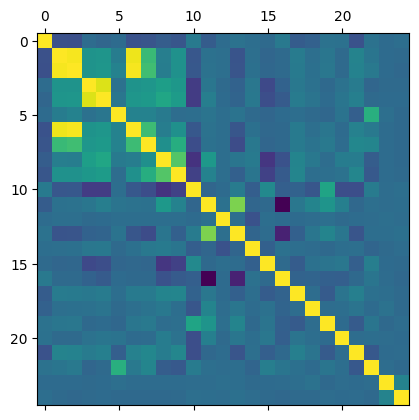

In [40]:
# Correlation Matrix of the dataframe
corrMatrix = df_factorized.corr()
print(corrMatrix)
# save the correlation matrix to csv file
corrMatrix.to_csv(COMX)
# create a png of the correlation matrix
# with the names of the columns on the x and y axis

plt.matshow(corrMatrix)
plt.show()

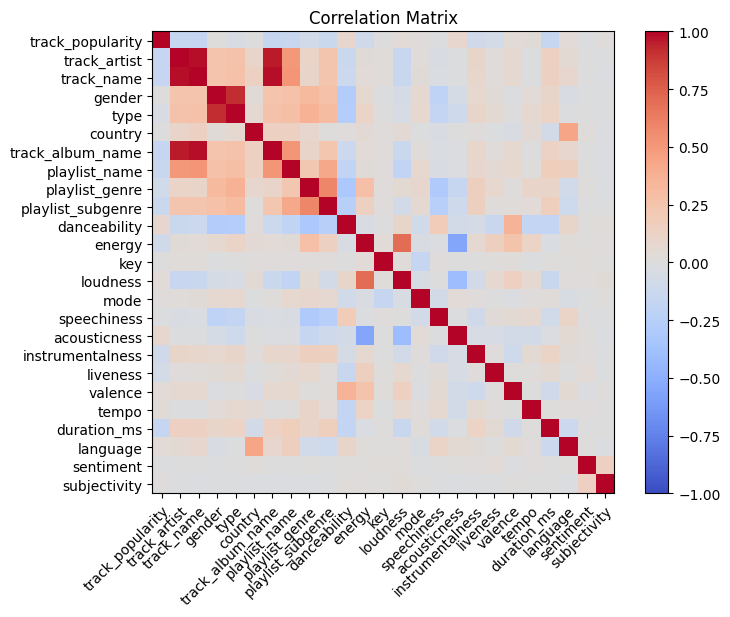

In [41]:
correlation_matrix = df_factorized.corr()
fig, ax = plt.subplots(figsize=(8, 6))

# Create a colormap for the correlation matrix plot
cmap = plt.get_cmap("coolwarm")

# Plot the correlation matrix using imshow function
im = ax.imshow(correlation_matrix, cmap=cmap, vmin=-1, vmax=1)

# Add colorbar to the plot
cbar = ax.figure.colorbar(im, ax=ax)

# Set the tick labels and axis labels
ax.set_xticks(np.arange(len(correlation_matrix.columns)))
ax.set_yticks(np.arange(len(correlation_matrix.index)))
ax.set_xticklabels(correlation_matrix.columns)
ax.set_yticklabels(correlation_matrix.index)

# Rotate the x-axis tick labels for better visibility
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Set the title of the plot
ax.set_title("Correlation Matrix")

# Show the plot
plt.show()

### Dropping unimportant columns
We decided to delete the following columns, because they are not that important and often contain unique or nealy unique values (See 'Statistical Information about the data' and 'Create the Correlation Matrix')
- track_artist
- track_name
- playlist_name
- track_album_name

In [42]:
# delete the columns track_artist, track_name, playlist_name, track_album_name
# because they are not important for the prediction
df.drop(['track_artist', 'track_name', 'playlist_name', 'track_album_name'], axis=1, inplace=True)
print(df.head())

   track_popularity gender    type country playlist_genre   playlist_subgenre  \
0              74.0   male  person      CA            r&b  urban contemporary   
1              18.0   male  person      CA            r&b             hip pop   
2               2.0   male  person      CA            rap    southern hip hop   
3               1.0   male  person      CA            rap    southern hip hop   
4              12.0   male  person      CA            pop          electropop   

   danceability  energy  key  loudness  ...  speechiness  acousticness  \
0         0.492   0.260  9.0   -17.341  ...       0.0921       0.64600   
1         0.735   0.482  8.0    -9.445  ...       0.1390       0.00623   
2         0.459   0.925  5.0    -1.327  ...       0.3500       0.24800   
3         0.765   0.452  6.0    -6.644  ...       0.0680       0.00330   
4         0.771   0.629  1.0    -5.790  ...       0.0511       0.00802   

   instrumentalness  liveness  valence    tempo  duration_ms  langua

### Create the Correlation matrix again

   track_popularity  gender  type  country  playlist_genre  playlist_subgenre  \
0              74.0       0     0        0               0                  0   
1              18.0       0     0        0               0                  1   
2               2.0       0     0        0               1                  2   
3               1.0       0     0        0               1                  2   
4              12.0       0     0        0               2                  3   

   danceability  energy  key  loudness  ...  speechiness  acousticness  \
0         0.492   0.260  9.0   -17.341  ...       0.0921       0.64600   
1         0.735   0.482  8.0    -9.445  ...       0.1390       0.00623   
2         0.459   0.925  5.0    -1.327  ...       0.3500       0.24800   
3         0.765   0.452  6.0    -6.644  ...       0.0680       0.00330   
4         0.771   0.629  1.0    -5.790  ...       0.0511       0.00802   

   instrumentalness  liveness  valence    tempo  duration_ms  langua

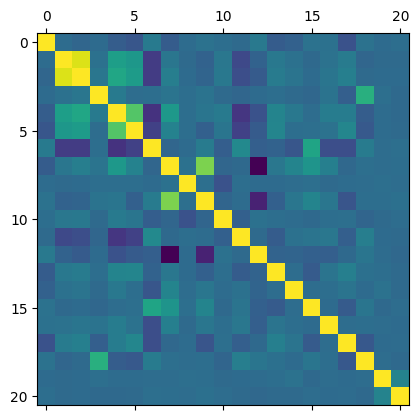

In [43]:
# For the correlation matrix we need to factorize the columns with strings

# copy the dataframe to a new dataframe to save the factorized dataframe
df_factorized = df.copy()

# changing every value that is a string to a number using factorize
df_factorized['gender'] = pd.factorize(df_factorized['gender'])[0]
df_factorized['country'] = pd.factorize(df_factorized['country'])[0]
# df['track_album_release_date'] = pd.factorize(df['track_album_release_date'])[0]
df_factorized['playlist_genre'] = pd.factorize(df_factorized['playlist_genre'])[0]
df_factorized['playlist_subgenre'] = pd.factorize(df_factorized['playlist_subgenre'])[0]
df_factorized['language'] = pd.factorize(df_factorized['language'])[0]
df_factorized['type'] = pd.factorize(df_factorized['type'])[0]

print(df_factorized.head())


# Correlation Matrix of the dataframe
corrMatrix = df_factorized.corr()
print(corrMatrix)
# save the correlation matrix to csv file
corrMatrix.to_csv(COMX)
# create a png of the correlation matrix
# with the names of the columns on the x and y axis

plt.matshow(corrMatrix)
plt.show()

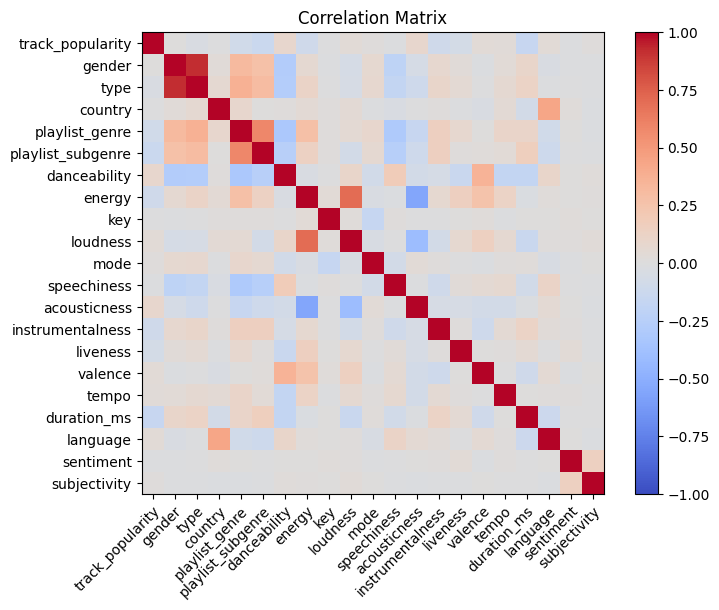

In [44]:
correlation_matrix = df_factorized.corr()
fig, ax = plt.subplots(figsize=(8, 6))

# Create a colormap for the correlation matrix plot
cmap = plt.get_cmap("coolwarm")

# Plot the correlation matrix using imshow function
im = ax.imshow(correlation_matrix, cmap=cmap, vmin=-1, vmax=1)

# Add colorbar to the plot
cbar = ax.figure.colorbar(im, ax=ax)

# Set the tick labels and axis labels
ax.set_xticks(np.arange(len(correlation_matrix.columns)))
ax.set_yticks(np.arange(len(correlation_matrix.index)))
ax.set_xticklabels(correlation_matrix.columns)
ax.set_yticklabels(correlation_matrix.index)

# Rotate the x-axis tick labels for better visibility
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Set the title of the plot
ax.set_title("Correlation Matrix")

# Show the plot
plt.show()
corrMatrix.to_csv(COMX)

### One hot-encoding of the data

To further process and later train on the data, we need to find a way to turn the string values into float/boolean values, without introducing new dependencies or neglecting existing dependencies.
To achive that, we decided to do One-hot-encoding. By that we introduce for each different string value in a column a new column, which will contain either the values 'true' or 'false'.

In [45]:
# One-Hot Encoding of the dataframe df
df_one_hot = pd.get_dummies(df)
print(df_one_hot.head())

   track_popularity  danceability  energy  key  loudness  mode  speechiness  \
0              74.0         0.492   0.260  9.0   -17.341   0.0       0.0921   
1              18.0         0.735   0.482  8.0    -9.445   1.0       0.1390   
2               2.0         0.459   0.925  5.0    -1.327   0.0       0.3500   
3               1.0         0.765   0.452  6.0    -6.644   0.0       0.0680   
4              12.0         0.771   0.629  1.0    -5.790   1.0       0.0511   

   acousticness  instrumentalness  liveness  ...  language_pl  language_pt  \
0       0.64600          0.001780    0.0705  ...            0            0   
1       0.00623          0.014400    0.4480  ...            0            0   
2       0.24800          0.000000    0.1740  ...            0            0   
3       0.00330          0.000046    0.0916  ...            0            0   
4       0.00802          0.002520    0.3560  ...            0            0   

   language_ro  language_so  language_sq  language_sv  l

## 2. PCA

In [46]:
# Dimensionality Reduction with PCA

# Separate the features and the target variable (if applicable)
features = df_one_hot.drop('track_popularity', axis=1)
target = df_one_hot['track_popularity']

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
print(scaled_features)

# Apply PCA
pca = PCA(n_components=15)  # Specify the desired number of components
reduced_features = pca.fit_transform(scaled_features)
print('---')
print('Variance Ratio:')
print(pca.explained_variance_ratio_)
# add all values of pca.explained_variance_ratio_ together
print(sum(pca.explained_variance_ratio_))


print('---')
print(reduced_features)

# Create a new dataframe with the reduced features
reduced_df = pd.DataFrame(reduced_features, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15'])

# Concatenate the reduced features dataframe with the target variable (if applicable)
if 'target_variable' in df.columns:
    reduced_df['target_variable'] = target

# Display the reduced dataframe
print(reduced_df.head())

[[-1.09629197 -2.49463848  1.00089708 ... -0.06831991 -0.01186615
  -0.03754785]
 [ 0.56397258 -1.2208237   0.72595811 ... -0.06831991 -0.01186615
  -0.03754785]
 [-1.32176     1.32106795 -0.09885881 ... -0.06831991 -0.01186615
  -0.03754785]
 ...
 [ 0.70745224  0.98253159  1.00089708 ... -0.06831991 -0.01186615
  -0.03754785]
 [ 0.14036599  1.04564854 -0.64873676 ... -0.06831991 -0.01186615
  -0.03754785]
 [-0.31740243  0.36283792 -0.09885881 ... -0.06831991 -0.01186615
  -0.03754785]]
---
Variance Ratio:
[0.03947829 0.0294197  0.02437904 0.02217219 0.01915321 0.01700359
 0.01527742 0.01468561 0.01404717 0.01376343 0.01298871 0.01225059
 0.01212956 0.01177857 0.01144894]
0.2699760145573319
---
[[-0.25909709 -3.1205323  -4.28747992 ...  0.37992422 -1.71692344
  -0.21653763]
 [-0.77045406 -2.13632146 -1.57573035 ... -0.769613   -0.33465519
  -0.94656441]
 [-1.34188386 -1.31540464  0.99626882 ... -1.49456331 -1.10015503
   0.09013602]
 ...
 [-2.14497196  3.8063789  -0.92761992 ...  0.177

The results of the Dimension Reduction with PCA are not specific enough to use the outcome for dimension reduction.

Due to that reason we will concentrat more on FS and BS.

## 3. Forward and Backward Selection

###Forward Selection

Forward Selection starts with an empty feature set and iteratively adds one feature at a time, selecting the feature that provides the best improvement in model performance until a desired criterion, such as accuracy or error, is met.

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [48]:
features = df_one_hot.drop('track_popularity', axis=1)
target = df_one_hot['track_popularity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create an empty list to store selected features
selected_features_FS = []

# Define an initial best score and feature
best_score = 0
best_feature = None

# Perform forward selection
while X_train.shape[1] > 0:
    remaining_features = list(set(X_train.columns) - set(selected_features_FS))
    scores = []

    for feature in remaining_features:
        model = LinearRegression()
        model.fit(X_train[selected_features_FS + [feature]], y_train)
        y_pred = model.predict(X_test[selected_features_FS + [feature]])
        score = r2_score(y_test, y_pred)
        scores.append((feature, score))

    # Sort the scores in descending order
    scores.sort(key=lambda x: x[1], reverse=True)

    if scores[0][1] > best_score:
        best_score = scores[0][1]
        best_feature = scores[0][0]
        selected_features_FS.append(best_feature)
    else:
        break

# Print the selected features
# after converting the algorithm will not add the left over features
print("Selected features:", selected_features_FS)

Selected features: ['playlist_genre_pop', 'playlist_subgenre_hip hop', 'playlist_subgenre_indie poptimism', 'country_NL', 'playlist_subgenre_new jack swing', 'playlist_subgenre_hip pop', 'playlist_subgenre_latin pop', 'playlist_subgenre_permanent wave', 'playlist_subgenre_urban contemporary', 'duration_ms', 'danceability', 'playlist_subgenre_electropop', 'playlist_subgenre_progressive electro house', 'playlist_subgenre_big room', 'tempo', 'playlist_subgenre_gangster rap', 'playlist_subgenre_southern hip hop', 'playlist_subgenre_neo soul', 'country_SE', 'energy', 'loudness', 'country_BR', 'playlist_subgenre_pop edm', 'country_CH', 'country_IS', 'country_MX', 'country_SN', 'language_no', 'country_BE', 'language_da', 'speechiness', 'language_it', 'country_NO', 'country_FR', 'subjectivity', 'sentiment', 'language_ko', 'country_PA', 'country_DE', 'language_de', 'country_CA', 'playlist_genre_rock', 'instrumentalness', 'playlist_subgenre_latin hip hop', 'country_TR', 'gender_female', 'playlis

### Backword selection

Backward Selection starts with a full feature set and iteratively removes one feature at a time, discarding the feature that contributes the least to the model's performance until a desired criterion, such as accuracy or error, is met.

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [50]:
features = df_one_hot.drop('track_popularity', axis=1)
target = df_one_hot['track_popularity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a list to store the selected features
selected_features_BS = list(features.columns)

# Define an initial best score and feature
best_score = 0
best_feature = None

# Perform backward selection
while len(selected_features_BS) > 0:
    scores = []

    for feature in selected_features_BS:
        model = LinearRegression()
        model.fit(X_train.drop(feature, axis=1), y_train)
        y_pred = model.predict(X_test.drop(feature, axis=1))
        score = r2_score(y_test, y_pred)
        scores.append((feature, score))

    # Sort the scores in descending order
    scores.sort(key=lambda x: x[1], reverse=True)

    if scores[0][1] > best_score:
        best_score = scores[0][1]
        best_feature = scores[0][0]
        selected_features_BS.remove(best_feature)
    else:
        break

# Print the selected features
print("Selected features:", selected_features_BS)

Selected features: ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'sentiment', 'subjectivity', 'gender_female', 'gender_male', 'gender_mixed', 'gender_other', 'type_group', 'type_person', 'country_AG', 'country_AR', 'country_AT', 'country_AU', 'country_BE', 'country_BR', 'country_CA', 'country_CH', 'country_CL', 'country_CN', 'country_CO', 'country_CU', 'country_CZ', 'country_DE', 'country_DK', 'country_DO', 'country_EE', 'country_ES', 'country_FI', 'country_FR', 'country_GB', 'country_GT', 'country_HU', 'country_ID', 'country_IE', 'country_IL', 'country_IN', 'country_IS', 'country_IT', 'country_JM', 'country_JP', 'country_KR', 'country_LT', 'country_LV', 'country_MY', 'country_NG', 'country_NL', 'country_NO', 'country_NZ', 'country_PA', 'country_PE', 'country_PH', 'country_PK', 'country_PL', 'country_PR', 'country_PT', 'country_RO', 'country_RU', 'country_SE', 'country_SG', 'countr

## 3.1 Analysis of the correlation matrix to figure out the threshold

To analyse the correlation matrix, we used a threshold to cut of the values that show high correlation values.

In [51]:
# Load the correlation matrix
correlation_matrix = pd.read_csv(COMX, index_col=0)

# Set the threshold for correlation coefficient
threshold = 0.6  # Adjust the threshold as per your requirement

# Create a mask to identify highly correlated features
print(correlation_matrix.abs())
mask = correlation_matrix.abs() >= threshold
print("___")
print(mask)


# Identify the columns to keep
# Will check if in a column is only one True value, if that is the case the value will be keeped for the future dataframe
columns_to_keep = correlation_matrix.columns[mask.sum() == 1]

# Create a new dataframe with reduced features
reduced_df = df[columns_to_keep]

# Display the reduced dataframe
print(reduced_df.head())

# print all the columns of the dataframe
print(reduced_df.columns)

                   track_popularity    gender      type   country  \
track_popularity           1.000000  0.000777  0.038358  0.003913   
gender                     0.000777  1.000000  0.918280  0.027371   
type                       0.038358  0.918280  1.000000  0.059143   
country                    0.003913  0.027371  0.059143  1.000000   
playlist_genre             0.091540  0.318347  0.371369  0.084561   
playlist_subgenre          0.132230  0.271224  0.303967  0.003939   
danceability               0.085328  0.274387  0.269067  0.009448   
energy                     0.095150  0.059530  0.112430  0.045373   
key                        0.002685  0.012029  0.003744  0.010229   
loudness                   0.036846  0.057673  0.047371  0.042392   
mode                       0.012904  0.063409  0.072969  0.015167   
speechiness                0.010408  0.206124  0.172721  0.034711   
acousticness               0.080129  0.060481  0.103355  0.004892   
instrumentalness           0.09621

Like often done in ML we tested for different thresholds and chose in the end the most promissing option.
Tested Thresholds:
- 0.5: 'track_popularity', 'country', 'playlist_name', 'danceability', 'key', 'mode', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'language'
- 0.6: additionally to the one before -> playlist_genre, playlist_subgenre, acousticness
- 0.7: additionally to the one before -> /
- 0.8: additionally to the one before -> enery, loudness
- 0.9: additionally to the one before -> /

-> **Results**: We have choosen 0.6 as a threshold and not 0.7, because with we would end up with the same features, but the cutoff is done at the threshold of 0.6

## 4. Combination of Results from FS, BS and Correlatoin Matrix

We programmed two different algorithms that will combine the results of our feature selection algorithms:

1. Combination of the results of FS and BS
  - the positions of the selected features is added up
  - the lower the value, the more important is the feature

2. Combination of the results of FS, BS and Correlation Matrix
  - the same first steps as before
  - if the feature was not selected by the correlation matrix analysis a penalty is added to the value

In [52]:
# Feature Selection based on the Forward Selection, Backward Selection and Correlation Matrix

# one hot encoding of reduced_df
df_one_hot_corr = pd.get_dummies(reduced_df)
# all columns in df_one_hot_corr
columns_to_keep = df_one_hot_corr.columns

# add the position of the values of the same feature in the lists: selected_features_FS, selected_features_BS
selected_features = {}
for index, feature in enumerate(selected_features_FS, start=1):
    selected_features[feature] = index
for index, feature in enumerate(selected_features_BS, start=1):
    if feature in selected_features:
        selected_features[feature] = selected_features[feature] + index
    else:
        selected_features[feature] = index + len(selected_features_FS)


# sort the dictionary by the values
selected_features_FSBS = dict(sorted(selected_features.items(), key=lambda item: item[1]))
print("Selected features FS and BS:")
print(selected_features_FSBS)

# create a list with just the features
selected_features_list_FSBS = list(selected_features_FSBS.keys())


# if the feature is not in the columns_to_keep, it will be added a penalty of 15
for feature in selected_features:
    if feature not in columns_to_keep:
        selected_features[feature] = selected_features[feature] + 100

# sort the dictionary by the values
selected_features_FSBSCM = dict(sorted(selected_features.items(), key=lambda item: item[1]))
print("Selected features FS, BS and CM:")
print(selected_features_FSBSCM)

# create a list with just the features
selected_features_list_FSBSCM = list(selected_features_FSBSCM.keys())


Selected features FS and BS:
{'danceability': 12, 'duration_ms': 22, 'energy': 22, 'loudness': 25, 'tempo': 26, 'country_MX': 26, 'speechiness': 37, 'country_BR': 48, 'subjectivity': 49, 'sentiment': 49, 'instrumentalness': 51, 'country_CH': 52, 'country_BE': 54, 'country_NL': 61, 'gender_female': 61, 'key': 64, 'mode': 66, 'country_CA': 68, 'acousticness': 68, 'liveness': 70, 'valence': 71, 'country_IS': 73, 'country_DE': 73, 'country_FR': 74, 'gender_male': 77, 'country_AT': 78, 'country_AG': 78, 'gender_mixed': 78, 'gender_other': 79, 'type_group': 80, 'type_person': 81, 'playlist_genre_pop': 83, 'country_AR': 83, 'country_AU': 85, 'country_SE': 88, 'country_CU': 88, 'country_CL': 90, 'country_NO': 91, 'country_CN': 91, 'country_CO': 92, 'country_CZ': 94, 'playlist_subgenre_hip hop': 96, 'country_DK': 96, 'country_DO': 97, 'country_SN': 98, 'country_PA': 98, 'country_EE': 98, 'playlist_subgenre_indie poptimism': 99, 'country_ES': 99, 'country_FI': 100, 'playlist_subgenre_hip pop': 1

## Results of Step of Feature Selection

Our thougths about the feature selection:

A) Based on the Correlation Matrix
To neglect:
- playlist_genre
- playlist_subgenre
- acousticness

B) Based on the FS and BS
To neglect:
- language
- playlist_subgenre

C) Based on the FS, BS and Correlation Matrix
To neglect:
- language
- type

In [53]:
# print the length of selected_features_list_FSBS
print("Length of selected_features_list_FSBS: ", len(selected_features_list_FSBS))
# print how many columns we have in df_one_hot
print("Length of df_one_hot: ", len(df_one_hot.columns))

print("Length of df_one_hot_corr: ", len(df_one_hot_corr.columns))

# which is the difference between the two lists
print("Difference between the two lists: ", list(set(df_one_hot.columns) - set(selected_features_list_FSBS)))

Length of selected_features_list_FSBS:  137
Length of df_one_hot:  138
Length of df_one_hot_corr:  130
Difference between the two lists:  ['track_popularity']


In [54]:
# drop of the columns language and playlist_subgenre
df_feature_selection = df.drop(['language', 'playlist_subgenre'], axis=1)
# print all columns of df_feature_selection
print(df_feature_selection.columns)
# one hot encoding of df_feature_selection
df_feature_selection = pd.get_dummies(df_feature_selection, drop_first=True)
print(df_feature_selection.head())

# print how many columns we have in df_feature_selection
print("Length of df_feature_selection: ", len(df_feature_selection.columns))

Index(['track_popularity', 'gender', 'type', 'country', 'playlist_genre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'sentiment', 'subjectivity'],
      dtype='object')
   track_popularity  danceability  energy  key  loudness  mode  speechiness  \
0              74.0         0.492   0.260  9.0   -17.341   0.0       0.0921   
1              18.0         0.735   0.482  8.0    -9.445   1.0       0.1390   
2               2.0         0.459   0.925  5.0    -1.327   0.0       0.3500   
3               1.0         0.765   0.452  6.0    -6.644   0.0       0.0680   
4              12.0         0.771   0.629  1.0    -5.790   1.0       0.0511   

   acousticness  instrumentalness  liveness  ...  country_US  country_UY  \
0       0.64600          0.001780    0.0705  ...           0           0   
1       0.00623          0.014400    0.4480  ...           0           0   

# FEATURE REDUCTION -- Results

The columns that we keeped:

'track_popularity', 'gender', 'type', 'country', 'playlist_genre',
'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
'duration_ms', 'sentiment', 'subjectivity'

---

### 1. Doing the feature reduction based on the correlation matrix


In [55]:
# copy of df_feature_selection
df_feature_selection_1 = df_feature_selection.copy()

# drop all columns that contain the word 'playlist_genre'
df_feature_selection_1 = df_feature_selection_1[df_feature_selection_1.columns.drop(list(df_feature_selection_1.filter(regex='playlist_genre')))]
# drop all colums that contain the word 'playlist_subgenre'
df_feature_selection_1 = df_feature_selection_1[df_feature_selection_1.columns.drop(list(df_feature_selection_1.filter(regex='playlist_subgenre')))]
# drop all colums that contain the word 'acousticness'
df_feature_selection_1 = df_feature_selection_1[df_feature_selection_1.columns.drop(list(df_feature_selection_1.filter(regex='acousticness')))]

print('Remaining Dataset for correlation matrix: ')
print(df_feature_selection_1.head())

Remaining Dataset for correlation matrix: 
   track_popularity  danceability  energy  key  loudness  mode  speechiness  \
0              74.0         0.492   0.260  9.0   -17.341   0.0       0.0921   
1              18.0         0.735   0.482  8.0    -9.445   1.0       0.1390   
2               2.0         0.459   0.925  5.0    -1.327   0.0       0.3500   
3               1.0         0.765   0.452  6.0    -6.644   0.0       0.0680   
4              12.0         0.771   0.629  1.0    -5.790   1.0       0.0511   

   instrumentalness  liveness  valence  ...  country_SG  country_SN  \
0          0.001780    0.0705    0.312  ...           0           0   
1          0.014400    0.4480    0.315  ...           0           0   
2          0.000000    0.1740    0.533  ...           0           0   
3          0.000046    0.0916    0.331  ...           0           0   
4          0.002520    0.3560    0.362  ...           0           0   

   country_TN  country_TR  country_TW  country_US  coun

### 2. Based on the Forward Selection and Backward Selection

Using the list 'selected_features_FSBS' to drop the features of df.

In [56]:
# copy the df_one_hot dataframe
df_feature_selection_2 = df_one_hot.copy()

# drop all everything that contains the word language, because we have already the one hot encoding of the language
df_feature_selection_2 = df_feature_selection_2.drop(df_feature_selection_2.filter(regex='language').columns, axis=1)
# drop all everything that contains the word playlist_subgenre, because we have already the one hot encoding of the playlist_subgenre
df_feature_selection_2 = df_feature_selection_2.drop(df_feature_selection_2.filter(regex='playlist_subgenre').columns, axis=1)

print("Remaining dataframe for FS and BS:")
print(df_feature_selection_2.head())

Remaining dataframe for FS and BS:
   track_popularity  danceability  energy  key  loudness  mode  speechiness  \
0              74.0         0.492   0.260  9.0   -17.341   0.0       0.0921   
1              18.0         0.735   0.482  8.0    -9.445   1.0       0.1390   
2               2.0         0.459   0.925  5.0    -1.327   0.0       0.3500   
3               1.0         0.765   0.452  6.0    -6.644   0.0       0.0680   
4              12.0         0.771   0.629  1.0    -5.790   1.0       0.0511   

   acousticness  instrumentalness  liveness  ...  country_UY  country_VE  \
0       0.64600          0.001780    0.0705  ...           0           0   
1       0.00623          0.014400    0.4480  ...           0           0   
2       0.24800          0.000000    0.1740  ...           0           0   
3       0.00330          0.000046    0.0916  ...           0           0   
4       0.00802          0.002520    0.3560  ...           0           0   

   country_XK  country_ZA  playli

### 3. Based on Correlation Matrix, Forward Selection and Backward Selection

In [57]:
# copy the df_one_hot dataframe
df_feature_selection_3 = df_one_hot.copy()

# drop all everything that contains the word language, because we have already the one hot encoding of the language
df_feature_selection_3 = df_feature_selection_3.drop(df_feature_selection_3.filter(regex='language').columns, axis=1)
# drop all everything that contains the word type, because we have already the one hot encoding of the type
df_feature_selection_3 = df_feature_selection_3.drop(df_feature_selection_3.filter(regex='type').columns, axis=1)
print("Remaining dataframe:")
print(df_feature_selection_3.head())

Remaining dataframe:
   track_popularity  danceability  energy  key  loudness  mode  speechiness  \
0              74.0         0.492   0.260  9.0   -17.341   0.0       0.0921   
1              18.0         0.735   0.482  8.0    -9.445   1.0       0.1390   
2               2.0         0.459   0.925  5.0    -1.327   0.0       0.3500   
3               1.0         0.765   0.452  6.0    -6.644   0.0       0.0680   
4              12.0         0.771   0.629  1.0    -5.790   1.0       0.0511   

   acousticness  instrumentalness  liveness  ...  \
0       0.64600          0.001780    0.0705  ...   
1       0.00623          0.014400    0.4480  ...   
2       0.24800          0.000000    0.1740  ...   
3       0.00330          0.000046    0.0916  ...   
4       0.00802          0.002520    0.3560  ...   

   playlist_subgenre_new jack swing  playlist_subgenre_permanent wave  \
0                                 0                                 0   
1                                 0          

# The Learning Method

We used different types of machine learning models to train our model with 3 different datasets.

- Support Vector Machines
- Neural Network Regression
- Linear Regression
- Random Forest Regression
- Polynomial Regression
---

##Support Vector Machines

In [58]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_error

### 1. SVM for the data based on the correlation matrix

Mean Squared Error: 690.2674461568414
Root Mean Squared Error: 26.27294133051801
R-squared Score: -0.0681
Mean Absolute Error: 19.977322838224808
Cross Validation Score: -0.10614307541998855


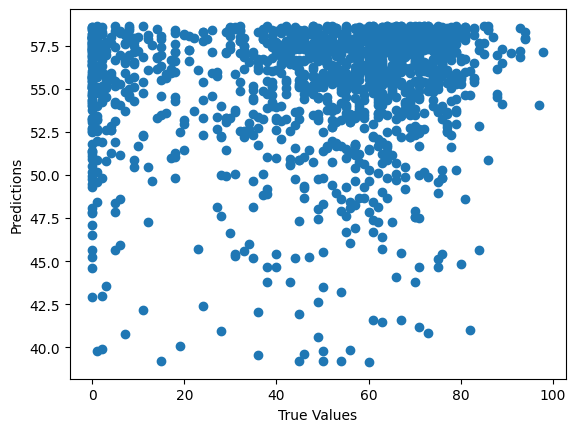

In [59]:
# Split the data into features (X) and target variable (y)
X = df_feature_selection_1.drop('track_popularity', axis=1)
y = df_feature_selection_1['track_popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the SVM regressor
svm_model = SVR()

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model with MSE, RMSE, R2, MAE and Cross Validation
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

r2 = r2_score(y_test, y_pred)
print("R-squared Score:", round(r2, 4))

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

scores = cross_val_score(svm_model, X, y, cv=5)
print("Cross Validation Score:", scores.mean())

# display the results in a plot
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

### 2. SVM for the data based on forward and backward selection

Mean Squared Error: 690.2272435937903
Root Mean Squared Error: 26.27217622493025
R-squared Score: -0.068
Mean Absolute Error: 19.97729657819115
Cross Validation Score: -0.1061352403502159


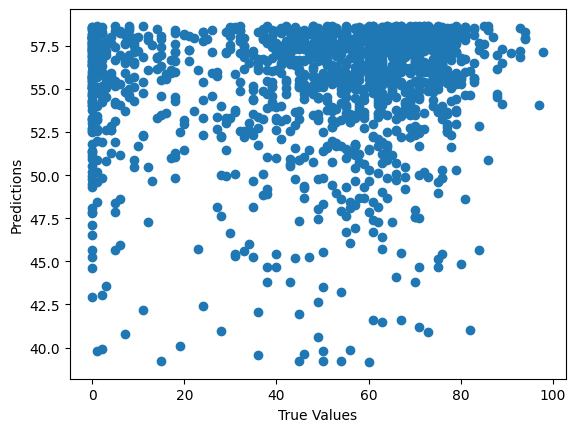

In [60]:
# Split the data into features (X) and target variable (y)
X = df_feature_selection_2.drop('track_popularity', axis=1)
y = df_feature_selection_2['track_popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the SVM regressor
svm_model = SVR()

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model with MSE, RMSE, R2, MAE and Cross Validation
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

r2 = r2_score(y_test, y_pred)
print("R-squared Score:", round(r2, 4))

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

scores = cross_val_score(svm_model, X, y, cv=5)
print("Cross Validation Score:", scores.mean())

# display the results in a plot
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

### 3. SVM for the data based on the correlation matrix and the forward and backward selection

Mean Squared Error: 690.2716356675389
Root Mean Squared Error: 26.273021060919866
R-squared Score: -0.0681
Mean Absolute Error: 19.977112683086546
Cross Validation Score: -0.10612943622495422


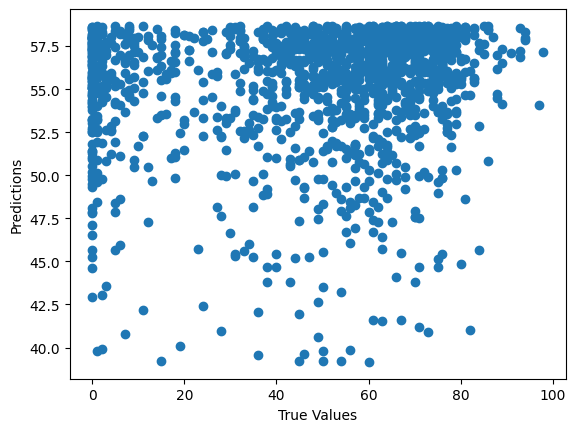

In [61]:
# Split the data into features (X) and target variable (y)
X = df_feature_selection_3.drop('track_popularity', axis=1)
y = df_feature_selection_3['track_popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the SVM regressor
svm_model = SVR()

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model with MSE, RMSE, R2, MAE and Cross Validation
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

r2 = r2_score(y_test, y_pred)
print("R-squared Score:", round(r2, 4))

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

scores = cross_val_score(svm_model, X, y, cv=5)
print("Cross Validation Score:", scores.mean())

# display the results in a plot
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

### Discussion of the results of SVM

The results are extremly similar for all three datasets.
The results are all not really promissing, easily visible when looking at the R-squared Score, which is bad if equal to 0 and good if equal to 1
The mean absolute Error is showing that the predictions are in average about 20 away from the actual value.

#### Diagram discussion

The diagram shows an upper of 58 and a lower bound of 38, which is obvioulsy not the the true case. This might be the case, because most of our training data is in the range of 40 to 60 and the SVMR is struggling to make accurate predictions outside this range.

## Neural Network Regression

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

### 1. Neural Network Regression for the data based on the correlation matrix


Mean Squared Error: 732.4915104140379
Root Mean Squared Error: 27.06458036648708
R-squared Score: -0.1334
Mean Absolute Error: 23.278318254533453
Cross Validation Score: -0.5473005737440778


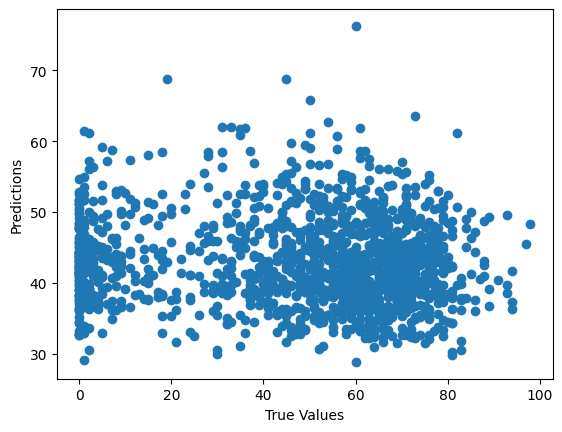

In [63]:
# Split the data into features (X) and target variable (y)
X = df_feature_selection_1.drop('track_popularity', axis=1)
y = df_feature_selection_1['track_popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the MLP regressor
mlp_model = MLPRegressor()

# Train the MLP model
mlp_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = mlp_model.predict(X_test)

# Evaluate the model with MSE, RMSE, R2, MAE and Cross Validation
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

r2 = r2_score(y_test, y_pred)
print("R-squared Score:", round(r2, 4))

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

scores = cross_val_score(mlp_model, X, y, cv=5)
print("Cross Validation Score:", scores.mean())

# display the results in a plot
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

### 2. Neural Network Regression for the data based on forward and backward selection

Mean Squared Error: 811.3600524363644
Root Mean Squared Error: 28.4843826058485
R-squared Score: -0.2555
Mean Absolute Error: 22.2629926940412
Cross Validation Score: -0.450989261974307


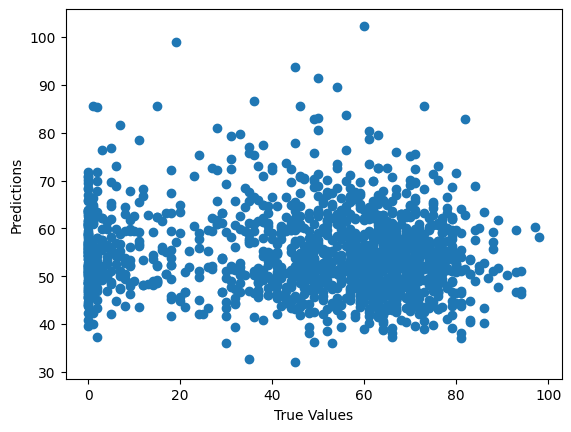

In [64]:
# Split the data into features (X) and target variable (y)
X = df_feature_selection_2.drop('track_popularity', axis=1)
y = df_feature_selection_2['track_popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the MLP regressor
mlp_model = MLPRegressor()

# Train the MLP model
mlp_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = mlp_model.predict(X_test)

# Evaluate the model with MSE, RMSE, R2, MAE and Cross Validation
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

r2 = r2_score(y_test, y_pred)
print("R-squared Score:", round(r2, 4))

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

scores = cross_val_score(mlp_model, X, y, cv=5)
print("Cross Validation Score:", scores.mean())

# display the results in a plot
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

### 3. Neural Network Regression for the data based on the correlation matrix and the forward and backward selection

Mean Squared Error: 725.5836460589437
Root Mean Squared Error: 26.93665989054589
R-squared Score: -0.1227
Mean Absolute Error: 23.412715380330436


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Cross Validation Score: -0.2205703007847509


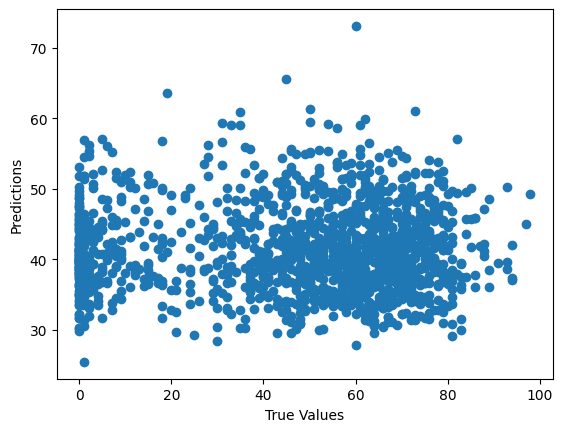

In [65]:
# Split the data into features (X) and target variable (y)
X = df_feature_selection_3.drop('track_popularity', axis=1)
y = df_feature_selection_3['track_popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the MLP regressor
mlp_model = MLPRegressor()

# Train the MLP model
mlp_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = mlp_model.predict(X_test)

# Evaluate the model with MSE, RMSE, R2, MAE and Cross Validation
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

r2 = r2_score(y_test, y_pred)
print("R-squared Score:", round(r2, 4))

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

scores = cross_val_score(mlp_model, X, y, cv=5)
print("Cross Validation Score:", scores.mean())

# display the results in a plot
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

### Discussion of the results of NNR

The results are worse than the results of the SVM.
The results are all not really promissing, easily visible when looking at the R-squared Score, which is bad if equal to 0 and good if equal to 1
The mean absolute Error is showing that the predictions are in average about 22 of from the actual value.

#### Diagram discussion

The diagrams show a bigger range than for SVM, The values range from 75 to 25, but overall the majority of the data is predicted to be between 30 and 55.

## Random Forest Regression

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score

### 1. Random Forest Regression for the data based on the correlation matrix

Mean Squared Error: 618.5884733427164
Root Mean Squared Error: 24.871438907765597
R-squared Score: 0.0428
Mean Absolute Error: 20.19954539057002
Cross Validation Score: 0.006285141672667338


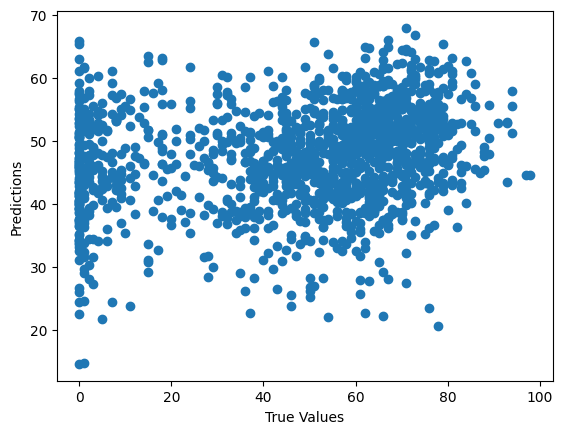

In [67]:
# Split the data into features (X) and target variable (y)
X = df_feature_selection_1.drop('track_popularity', axis=1)
y = df_feature_selection_1['track_popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model with MSE, RMSE, R2, MAE and Cross Validation
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

r2 = r2_score(y_test, y_pred)
print("R-squared Score:", round(r2, 4))

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

scores = cross_val_score(rf_model, X, y, cv=5)
print("Cross Validation Score:", scores.mean())

# display the results in a plot
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

### 2. Random Forest Regression for the data based on forward and backward selection

Mean Squared Error: 590.3873205109078
Root Mean Squared Error: 24.297887161457222
R-squared Score: 0.0865
Mean Absolute Error: 19.557971850809288
Cross Validation Score: 0.04712378989061783


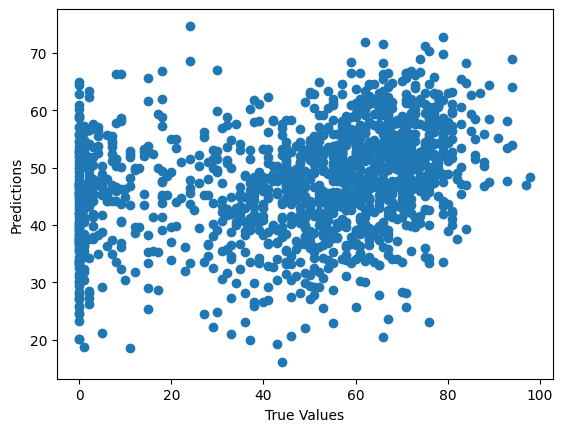

In [68]:
# Split the data into features (X) and target variable (y)
X = df_feature_selection_2.drop('track_popularity', axis=1)
y = df_feature_selection_2['track_popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model with MSE, RMSE, R2, MAE and Cross Validation
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

r2 = r2_score(y_test, y_pred)
print("R-squared Score:", round(r2, 4))

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

scores = cross_val_score(rf_model, X, y, cv=5)
print("Cross Validation Score:", scores.mean())

# display the results in a plot
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

### 3. Random Forest Regression for the data based on the correlation matrix and the forward and backward selection

Mean Squared Error: 525.779203096411
Root Mean Squared Error: 22.929875775860868
R-squared Score: 0.1864
Mean Absolute Error: 18.299211822660098
Cross Validation Score: 0.12545040927547435


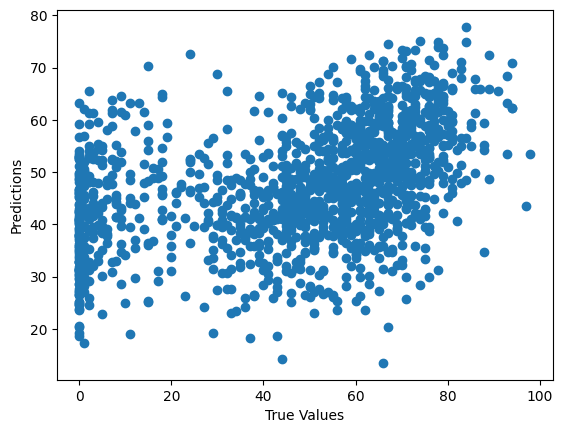

In [69]:
# Split the data into features (X) and target variable (y)
X = df_feature_selection_3.drop('track_popularity', axis=1)
y = df_feature_selection_3['track_popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model with MSE, RMSE, R2, MAE and Cross Validation
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

r2 = r2_score(y_test, y_pred)
print("R-squared Score:", round(r2, 4))

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

scores = cross_val_score(rf_model, X, y, cv=5)
print("Cross Validation Score:", scores.mean())

# display the results in a plot
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

### Discussion of the results of RFR

The results are the best so far.
When looking at the R-squared Score we can see that the results are no longer negative, but still very small, which is not a good sign.
The mean absolute Error is showing that the predictions are in average about 19 of from the actual value.
We can see that the RFR is performing the best on the third dataset

#### Diagram discussion

It is the first time, that a positive direction for the higher true values is visible. The predictions for the higher true values show a better fit!

## Polynomial Regression

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score

### 1. Polynomial Regression for the data based on the correlation matrix

Mean Squared Error: 1030.5108561037598
Root Mean Squared Error: 32.10157092890876
R-squared Score: -0.5946
Mean Absolute Error: 21.841644338703535
Cross Validation Score: -322.5348307615517


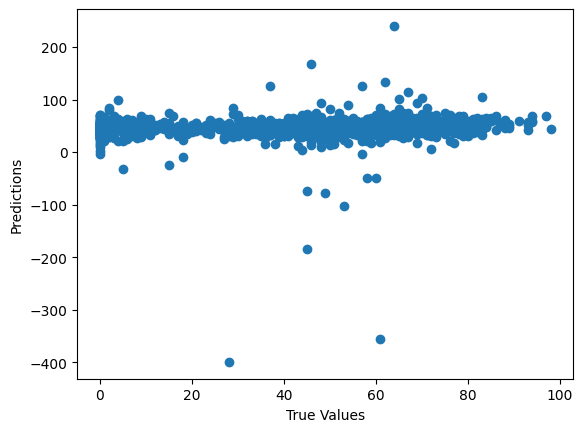

In [71]:
# Split the data into features (X) and target variable (y)
X = df_feature_selection_1.drop('track_popularity', axis=1)
y = df_feature_selection_1['track_popularity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

# Initialize the Polynomial Regression model
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
poly.fit(X_poly, y_train)
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_poly, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(poly.fit_transform(X_test))

# Evaluate the model with MSE, RMSE, R2, MAE and Cross Validation
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

r2 = r2_score(y_test, y_pred)
print("R-squared Score:", round(r2, 4))

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

scores = cross_val_score(lr_model, X_poly, y_train, cv=5)
print("Cross Validation Score:", scores.mean())

# display the results in a plot
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

### 2. Polynomial Regression for the data based on forward and backward

Mean Squared Error: 2561.5255966612485
Root Mean Squared Error: 50.611516443011745
R-squared Score: -2.9636
Mean Absolute Error: 24.627904532829046
Cross Validation Score: -22.785831516069816


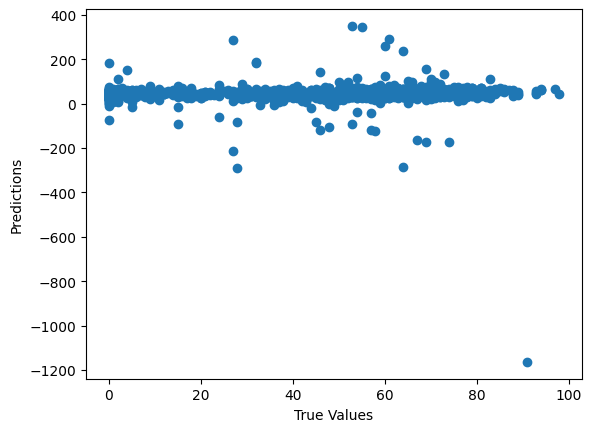

In [72]:
# Split the data into features (X) and target variable (y)
X = df_feature_selection_2.drop('track_popularity', axis=1)
y = df_feature_selection_2['track_popularity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

# Initialize the Polynomial Regression model
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
poly.fit(X_poly, y_train)
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_poly, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(poly.fit_transform(X_test))

# Evaluate the model with MSE, RMSE, R2, MAE and Cross Validation
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

r2 = r2_score(y_test, y_pred)
print("R-squared Score:", round(r2, 4))

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

scores = cross_val_score(lr_model, X_poly, y_train, cv=5)
print("Cross Validation Score:", scores.mean())

# display the results in a plot
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

### 3. Polynomial Regression for the data based on the correlation matrix and the forward and backward selection


Mean Squared Error: 4410.881289629246
Root Mean Squared Error: 66.41446596660434
R-squared Score: -5.8252
Mean Absolute Error: 25.11597963392201
Cross Validation Score: -2.1271571649158747


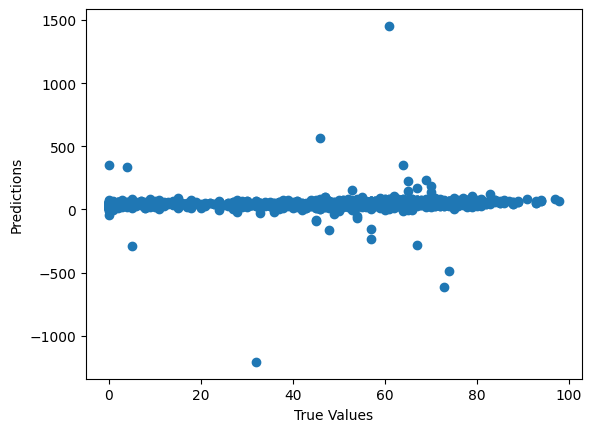

In [73]:
# Split the data into features (X) and target variable (y)
X = df_feature_selection_3.drop('track_popularity', axis=1)
y = df_feature_selection_3['track_popularity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

# Initialize the Polynomial Regression model
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
poly.fit(X_poly, y_train)
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_poly, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(poly.fit_transform(X_test))

# Evaluate the model with MSE, RMSE, R2, MAE and Cross Validation
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

r2 = r2_score(y_test, y_pred)
print("R-squared Score:", round(r2, 4))

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

scores = cross_val_score(lr_model, X_poly, y_train, cv=5)
print("Cross Validation Score:", scores.mean())

# display the results in a plot
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

### Discussion of the results of PR

The results are the worst of our results.
They show a very high R-squared Score and also the highest MSE.
The mean absolute Error is showing that the predictions are in the worst case about 25 of from the actual value.
The third dataset is performing the worst

#### Diagram discussion

For the PR some insane outliers are predicted, which are never represented in the training data, although most of the data is predicted to be around the normal correct interval of 0 to 100

## Linear Regression

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score

### 1. Linear Regression for the data based on the correlation matrix

Mean Squared Error: 596.5712740852113
Root Mean Squared Error: 24.424808578271627
R-squared Score: 0.0769
Mean Absolute Error: 19.836846693506267
Cross Validation Score: 0.017895888377151857


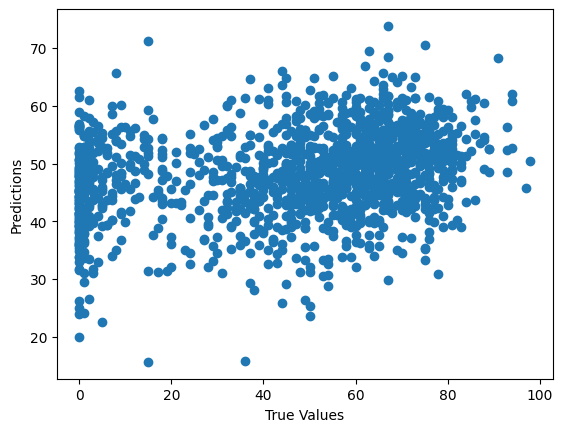

In [75]:
# Split the data into features (X) and target variable (y)
X = df_feature_selection_1.drop('track_popularity', axis=1)
y = df_feature_selection_1['track_popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model with MSE, RMSE, R2, MAE and Cross Validation
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

r2 = r2_score(y_test, y_pred)
print("R-squared Score:", round(r2, 4))

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

scores = cross_val_score(lr_model, X, y, cv=5)
print("Cross Validation Score:", scores.mean())

# display the results in a plot
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

### 2. Linear Regression for the data based on forward and backward selection

Mean Squared Error: 570.8587678762351
Root Mean Squared Error: 23.892650917724367
R-squared Score: 0.1167
Mean Absolute Error: 19.281272824959004
Cross Validation Score: 0.05187115684334733


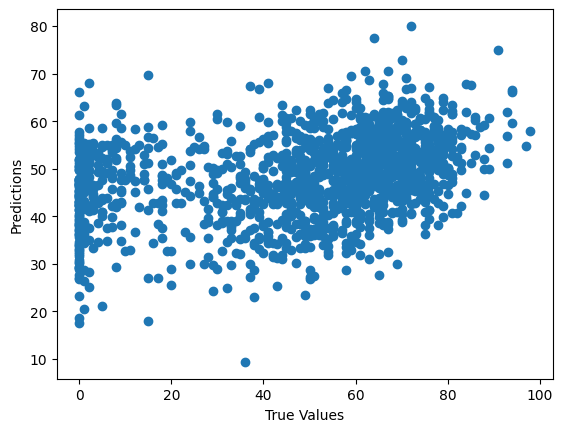

In [76]:
# Split the data into features (X) and target variable (y)
X = df_feature_selection_2.drop('track_popularity', axis=1)
y = df_feature_selection_2['track_popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model with MSE, RMSE, R2, MAE and Cross Validation
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

r2 = r2_score(y_test, y_pred)
print("R-squared Score:", round(r2, 4))

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

scores = cross_val_score(lr_model, X, y, cv=5)
print("Cross Validation Score:", scores.mean())

# display the results in a plot
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

### 3. Linear Regression for the data based on the correlation matrix and the forward and backward selection

Mean Squared Error: 512.2479215520815
Root Mean Squared Error: 22.632894679030375
R-squared Score: 0.2074
Mean Absolute Error: 17.95534440038643
Cross Validation Score: 0.13040086185040228


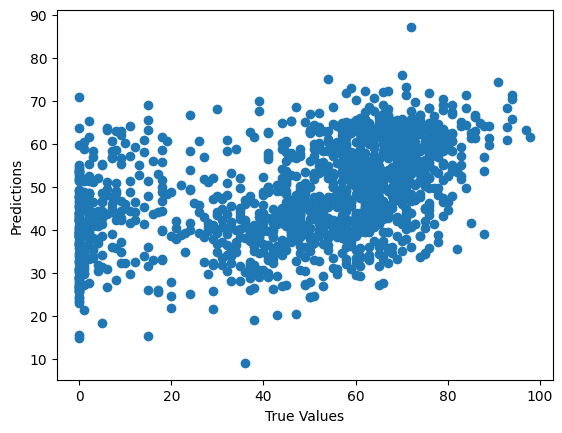

In [77]:
# Split the data into features (X) and target variable (y)
X = df_feature_selection_3.drop('track_popularity', axis=1)
y = df_feature_selection_3['track_popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model with MSE, RMSE, R2, MAE and Cross Validation
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

r2 = r2_score(y_test, y_pred)
print("R-squared Score:", round(r2, 4))

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

scores = cross_val_score(lr_model, X, y, cv=5)
print("Cross Validation Score:", scores.mean())

# display the results in a plot
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

### Discussion of the results of LR

The results are the best of all our tested models, showing a relativly high r-squared score and relative low MSE, RMSE and MAE values.
Still they are relativly high.
The third dataset is performing the best.

#### Diagram discussion

Similar to the RTR a curve in the data can be seen, so that the true high values are predicted more accurate. This is especially good to observe, when looking at the third dataframe

# Own Example feature with prediction

Using Linear Regression and df_feature_selection_3 because it has the best results on the validation data

Everyone of us three came up with an own song idea:
- Fin: Similar to the most popular songs
- Noemi: Happy fast past pop song
- Afrooz: Sad turkish song

---

In [78]:
### To get an overview from which columns the data is ranging from

# print all different countries in the df
print(df['country'].unique())
# print all different languages in the df
print(df['language'].unique())
# print all different playlist genres in the df
print(df['playlist_genre'].unique())
# print all different playlist subgenres in the df
print(df['playlist_subgenre'].unique())
# print all different types in the df
print(df['type'].unique())
#print all different keys in the df
print(df['key'].unique())
#print all different modes in the df
print(df['mode'].unique())
# print all different valence in the df
print(df['valence'].unique())

['CA' 'US' 'GB' 'CO' 'PR' 'NO' 'FR' 'AU' 'PA' 'SE' 'DE' 'NL' 'BR' 'DO'
 'AR' 'MX' 'JM' 'KR' 'ES' 'AT' 'DK' 'IT' 'VE' 'NZ' 'IE' 'TR' 'CU' 'BE'
 'RO' 'IL' 'PL' 'UY' 'JP' 'FI' 'CL' 'AG' 'PT' 'NG' 'XK' 'ID' 'PH' 'SN'
 'LT' 'IS' 'PE' 'CH' 'IN' 'ZA' 'RU' 'GT' 'PK' 'CZ' 'TN' 'EE' 'SG' 'CN'
 'MY' 'TW' 'HU' 'LV']
['en' 'es' 'sw' 'fr' 'tr' 'so' 'de' 'id' 'tl' 'ro' 'vi' 'nl' 'hu' 'it'
 'af' 'pt' 'da' 'cy' 'ko' 'pl' 'no' 'sv' 'sq' 'et' 'hi' 'ja' 'ar']
['r&b' 'rap' 'pop' 'latin' 'edm' 'rock']
['urban contemporary' 'hip pop' 'southern hip hop' 'electropop'
 'latin pop' 'pop edm' 'hip hop' 'gangster rap' 'latin hip hop' 'trap'
 'post-teen pop' 'indie poptimism' 'tropical' 'dance pop' 'reggaeton'
 'big room' 'neo soul' 'electro house' 'progressive electro house'
 'album rock' 'permanent wave' 'classic rock' 'hard rock' 'new jack swing']
['person' 'group']
[ 9.  8.  5.  6.  1. 11.  0.  7.  2. 10.  4.  3.]
[0. 1.]
[0.312  0.315  0.533  ... 0.977  0.0949 0.0695]


In [79]:
### Fin's Song Idea

# create own feature to pass into the trained model for prediction
# 1. create a dictionary with the same keys as the dataframe
# 2. create a dataframe from the dictionary
# 3. pass the dataframe into the trained model for prediction

# 1. create a dictionary with the same keys as the dataframe
# with all the follwing values: 'track_popularity', 'track_artist', 'track_name', 'gender', 'type', 'country', 'track_album_name', 'playlist_name', 'playlist_genre','playlist_subgenre', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'language', 'sentiment', 'subjectivity'
data_dict = {
    'track_artist': 'Fin',
    'track_name': 'Big Data',
    'gender': 'male',
    'type': 'artist',
    'country': 'DE',
    'track_album_name': 'Big Data',
    'playlist_name': 'Hip Hop',
    'playlist_genre': 'edm',
    'playlist_subgenre': 'electropop',
    'danceability': 0.9,
    'energy': 0.9,
    'key': 1,
    'loudness': 0.5,
    'mode': 1,
    'speechiness': 0.3,
    'acousticness': 0.6,
    'instrumentalness': 0.5,
    'liveness': 1,
    'valence': 0.5,
    'tempo': 0.9,
    'duration_ms': 200000,
    'language': 'en',
    'sentiment': 0.5,
    'subjectivity': 0.5
}

# 2. create a dataframe from the dictionary
# copy the df_feature_selection_3 and just keep the first rows
df_fin = df_feature_selection_3.head(1).copy()
print(df_fin)
# change the values of the df_fin to the values of the data_dict, if the values are not in the data_dict, then change the values to false
for key, value in data_dict.items():
    if key in df_fin.columns:
        df_fin[key] = value
    else:
        df_fin[key] = False

# compare the columns of the df_fin and the df_feature_selection_3, if df_fin has more columns, then drop the columns that are not in df_feature_selection_3
for column in df_fin.columns:
    if column not in df_feature_selection_3.columns:
        df_fin.drop(column, axis=1, inplace=True)

# 3. pass the dataframe into the trained model for prediction
# Split the data into features (X) and target variable (y)
X = df_fin.drop('track_popularity', axis=1)
y = df_fin['track_popularity']

# Make predictions on the test set
y_pred = lr_model.predict(X)

print("Fin's Song Idea: " + str(y_pred))


   track_popularity  danceability  energy  key  loudness  mode  speechiness  \
0              74.0         0.492    0.26  9.0   -17.341   0.0       0.0921   

   acousticness  instrumentalness  liveness  ...  \
0         0.646           0.00178    0.0705  ...   

   playlist_subgenre_new jack swing  playlist_subgenre_permanent wave  \
0                                 0                                 0   

   playlist_subgenre_pop edm  playlist_subgenre_post-teen pop  \
0                          0                                0   

   playlist_subgenre_progressive electro house  playlist_subgenre_reggaeton  \
0                                            0                            0   

   playlist_subgenre_southern hip hop  playlist_subgenre_trap  \
0                                   0                       0   

   playlist_subgenre_tropical  playlist_subgenre_urban contemporary  
0                           0                                     1  

[1 rows x 109 columns]
Fin'

In [80]:
### Noemi's Song Idea

# create own feature to pass into the trained model for prediction
# 1. create a dictionary with the same keys as the dataframe
# 2. create a dataframe from the dictionary
# 3. pass the dataframe into the trained model for prediction

# 1. create a dictionary with the same keys as the dataframe
# with all the follwing values: 'track_popularity', 'track_artist', 'track_name', 'gender', 'type', 'country', 'track_album_name', 'playlist_name', 'playlist_genre','playlist_subgenre', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'language', 'sentiment', 'subjectivity'
data_dict = {
    'track_artist': 'Noemi',
    'track_name': 'Big Data',
    'gender': 'female',
    'type': 'artist',
    'country': 'CA',
    'track_album_name': 'Big Data',
    'playlist_name': 'Best songs',
    'playlist_genre': 'pop',
    'playlist_subgenre': 'dance pop',
    'danceability': 0.95,
    'energy': 0.8,
    'key': 7,
    'loudness': 0.6,
    'mode': 1,
    'speechiness': 0.5,
    'acousticness': 0.4,
    'instrumentalness': 0.5,
    'liveness': 0.7,
    'valence': 0.4,
    'tempo': 0.8,
    'duration_ms': 210000,
    'language': 'en',
    'sentiment': 0.8,
    'subjectivity': 0.5
}

# 2. create a dataframe from the dictionary
# copy the df_feature_selection_3 and just keep the first rows
df_noemi = df_feature_selection_3.head(1).copy()

# change the values of the df_noemi to the values of the data_dict, if the values are not in the data_dict, then change the values to false
for key, value in data_dict.items():
    if key in df_noemi.columns:
        df_noemi[key] = value
    else:
        df_noemi[key] = False



# compare the columns of the df_afrooz and the df_feature_selection_3, if df_afrooz has more columns, then drop the columns that are not in df_feature_selection_3
for column in df_noemi.columns:
    if column not in df_feature_selection_3.columns:
        df_noemi.drop(column, axis=1, inplace=True)


# 3. pass the dataframe into the trained model for prediction
# Split the data into features (X) and target variable (y)
X = df_noemi.drop('track_popularity', axis=1)
y = df_noemi['track_popularity']

# Make predictions on the test set
y_pred = lr_model.predict(X)

print("Noemi's Song Idea: " + str(y_pred))


Noemi's Song Idea: [54.5446929]


In [81]:
### Afrooz's Song Idea

# create own feature to pass into the trained model for prediction
# 1. create a dictionary with the same keys as the dataframe
# 2. create a dataframe from the dictionary
# 3. pass the dataframe into the trained model for prediction

# 1. create a dictionary with the same keys as the dataframe
# with all the follwing values: 'track_popularity', 'track_artist', 'track_name', 'gender', 'type', 'country', 'track_album_name', 'playlist_name', 'playlist_genre','playlist_subgenre', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'language', 'sentiment', 'subjectivity'
data_dict = {
    'track_artist': 'Afrooz',
    'track_name': 'Big Data',
    'gender': 'female',
    'type': 'artist',
    'country': 'TR',
    'track_album_name': 'Big Data',
    'playlist_name': 'Worst songs',
    'playlist_genre': 'rap',
    'playlist_subgenre': 'neo soul',
    'danceability': 0.1,
    'energy': 0.2,
    'key': 1,
    'loudness': 0.4,
    'mode': 0,
    'speechiness': 0.8,
    'acousticness': 0.6,
    'instrumentalness': 0.7,
    'liveness': 0.2,
    'valence': 0.5,
    'tempo': 0.1,
    'duration_ms': 180000,
    'language': 'tr',
    'sentiment': 0.04,
    'subjectivity': 0.9
}

# 2. create a dataframe from the dictionary
# copy the df_feature_selection_3 and just keep the first rows
df_afrooz = df_feature_selection_3.head(1).copy()

# change the values of the df_afrooz to the values of the data_dict, if the values are not in the data_dict, then change the values to false
for key, value in data_dict.items():
    if key in df_afrooz.columns:
        df_afrooz[key] = value
    else:
        df_afrooz[key] = False


# compare the columns of the df_afrooz and the df_feature_selection_3, if df_afrooz has more columns, then drop the columns that are not in df_feature_selection_3
for column in df_afrooz.columns:
    if column not in df_feature_selection_3.columns:
        df_afrooz.drop(column, axis=1, inplace=True)

# 3. pass the dataframe into the trained model for prediction
# Split the data into features (X) and target variable (y)
X = df_afrooz.drop('track_popularity', axis=1)
y = df_afrooz['track_popularity']

# Make predictions on the test set
y_pred = lr_model.predict(X)

print("Afrooz's Song Idea: " + str(y_pred))


Afrooz's Song Idea: [56.547673]


### Results of our own Song ideas

**Afrooz won** our internal Competition of building the most successful song

- Fin's Song Idea: [51.44037836]
- Noemi's Song Idea: [54.5446929]
- Afrooz's Song Idea: [56.547673]

# Discussion of the Results of our trained Models

The best result of all our trained model was: **Linear Regression Model**

The best training data set was: **df_feature_selection_3** (neglecting: language, type)

Still the results are not promissing, showing very high Error Rates. But in an internal discussion we came to the conclusion that music is extremly subjective. It is very hard to train a model that should predict the success of a song, where the success is not clearly defined and even the top successful songs of the past have very different values.